В данном ноутбуке проведены исследования по 1-2 шагам из README:

    === ШАГ 1: Исследование данных ===
        ЭТАП 1: Исследование и анализ данных о клиентах
        ЭТАП 2: EDA
        ЭТАП 3: Объеденение данных и FEATURE ENGINEERING  
        ЭТАП 4: Сохранение данных
       

    === ШАГ 2: Подготовка инфраструктуры ===


=== ШАГ 1: Исследование данных ===  
ЭТАП 1: Исследование и анализ данных о клиентах  

Загружаем библиотеки необходимые для выполнения кода ноутбука.  

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
RANDOM_STATE = 42
# Пути и названия файлов заданы в виде параметров
PATH_DATA = 'data'

PATH_MODELS = 'models'
MODEL_FILE = 'model.pkl'

ASSETS_DIR = 'mlflow_server/eda_plots'

In [3]:
def load_data_safe(file_name):
    """
    загружает CSV файл с обработкой ошибок
    """
    try:
        df = pd.read_csv(file_name)
        print(f"УСПЕХ: {file_name} загружен")
        return df
    except FileNotFoundError:
        print(f"ОШИБКА: Файл {file_name} не найден")
        return None
    except Exception as e:
        print(f"ОШИБКА при загрузке {file_name}: {e}")
        return None

In [4]:
# Загрузка данных с обработкой ошибок
category_tree = load_data_safe(f'{PATH_DATA}/category_tree.csv')
events = load_data_safe(f'{PATH_DATA}/events.csv')
item_properties_part1 = load_data_safe(f'{PATH_DATA}/item_properties_part1.csv')
item_properties_part2 = load_data_safe(f'{PATH_DATA}/item_properties_part2.csv')


УСПЕХ: data/category_tree.csv загружен
УСПЕХ: data/events.csv загружен
УСПЕХ: data/item_properties_part1.csv загружен
УСПЕХ: data/item_properties_part2.csv загружен


In [5]:
# Выведем основную информацию о каждом датасете
print("=== category_tree ===")
category_tree.info()
category_tree.head(10)

=== category_tree ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


`category_tree.csv` — таблица из двух столбцов: «родительская категория» и «дочерняя категория». Типичный способ представления таблицы в виде дерева.

In [6]:
print("\n=== events ===")
events.info()
events.head(10)


=== events ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


`events.csv` — таблица с логом событий:  
- `timestamp` — временная метка события,  
- `visitorid`— идентификатор пользователя,  
- `event` — событие (просмотр, добавление в корзину, покупка),  
- `itemid` — идентификатор товара,  
- `transactionid` — идентификатор транзакции (покупки)  

In [7]:
print("\n=== item_properties_part1 ===")
item_properties_part1.info()
item_properties_part1.head(10)


=== item_properties_part1 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB


,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


`item_properties_part1.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [8]:
print("\n=== item_properties_part2 ===")
item_properties_part2.info()
item_properties_part2.head(10)


=== item_properties_part2 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062
5,1433041200000,286407,202,820407
6,1438484400000,256368,888,437265 1296497 n24.000 229949 651738 285933
7,1437879600000,307534,888,150169 212349 1095303 824508 1257235 153900
8,1439089200000,102767,888,5135 790941 1055803 221748 122132 n12.000 1135...
9,1431831600000,215180,71,1096621


`item_properties_part2.csv` — таблица со свойствами товаров:  
- `timestamp` — временная метка добавления свойства,  
- `itemid` — идентификатор товара,  
- `property` — свойство товара,  
- `value` — значение свойства.  

In [9]:
# Объединим item_properties_part1 и item_properties_part2 в один датафрейм
item_properties = pd.concat([item_properties_part1, item_properties_part2], ignore_index=True)
print(f"Объединенная таблица item_properties: {item_properties.shape[0]:,} строк")

Объединенная таблица item_properties: 20,275,902 строк


In [10]:
# Проверка на пропуски
print(" ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
print(f"   - category_tree пропуски: {category_tree.isnull().sum().sum()}")
print(f"   - events пропуски: {events.isnull().sum().sum()}")
print(f"   - item_properties пропуски: {item_properties.isnull().sum().sum()}")

 ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
   - category_tree пропуски: 25
   - events пропуски: 2733644
   - item_properties пропуски: 0


In [11]:
print("\n ПРОВЕРКА ДУБЛИКАТОВ:")

# Полные дубликаты
cat_duplicates = category_tree.duplicated().sum()
events_duplicates = events.duplicated().sum()
item_props_duplicates = item_properties.duplicated().sum()

print(f"   - category_tree: {cat_duplicates:,} полных дубликатов")
print(f"   - events: {events_duplicates:,} полных дубликатов") 
print(f"   - item_properties: {item_props_duplicates:,} полных дубликатов")


 ПРОВЕРКА ДУБЛИКАТОВ:
   - category_tree: 0 полных дубликатов
   - events: 460 полных дубликатов
   - item_properties: 0 полных дубликатов


In [12]:
print("=" * 80)
print("ОЧИСТКА И ПОДГОТОВКА ДАННЫХ")
print("=" * 80)

# 1. Очистка дубликатов в events
print("1. ОЧИСТКА ДУБЛИКАТОВ:")
initial_events_size = len(events)

if events_duplicates > 0:
    events = events.drop_duplicates()
    print(f"    Удалено {events_duplicates} полных дубликатов из events")

# Проверим частичные дубликаты в events (более опасные!)
events_key_duplicates = events.duplicated(subset=['timestamp', 'visitorid', 'itemid', 'event']).sum()
print(f"   - events частичные дубликаты (ключевые поля): {events_key_duplicates:,}")

if events_key_duplicates > 0:
    events = events.drop_duplicates(subset=['timestamp', 'visitorid', 'itemid', 'event'])
    print(f" Удалено {events_key_duplicates} частичных дубликатов из events")

print(f" Размер events: {initial_events_size:,} → {len(events):,} строк")

# 2. Переименование столбцов в PEP8
print("\n2. ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (PEP8):")

print("   До переименования:")
print(f"   - category_tree: {list(category_tree.columns)}")
print(f"   - events: {list(events.columns)}")
print(f"   - item_properties: {list(item_properties.columns)}")

# Переименование согласно PEP8 (snake_case)
category_tree = category_tree.rename(columns={
    'categoryid': 'category_id',
    'parentid': 'parent_id'
})

events = events.rename(columns={
    'visitorid': 'visitor_id', 
    'itemid': 'item_id',
    'transactionid': 'transaction_id'
})

item_properties = item_properties.rename(columns={
    'itemid': 'item_id'
})

print("   После переименования:")
print(f"   - category_tree: {list(category_tree.columns)}")
print(f"   - events: {list(events.columns)}")
print(f"   - item_properties: {list(item_properties.columns)}")

# 3. Детальный анализ пропусков
print("\n3. ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")

# В events
events_nulls = events.isnull().sum()
print(f"   - events:")
print(f"     transaction_id: {events_nulls['transaction_id']:,} пропусков")
print(f"     (это ожидаемо - пропуски для событий 'view' и 'addtocart')")

# В category_tree
category_nulls = category_tree.isnull().sum()
print(f"   - category_tree:")
print(f"     parent_id: {category_nulls['parent_id']:,} пропусков")
print(f"     (это корневые категории - ожидаемо)")

# В item_properties
item_props_nulls = item_properties.isnull().sum()
print(f"   - item_properties: {item_props_nulls.sum():,} пропусков")

# 4. Проверка целостности данных
print("\n4. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")

# В category_tree - проверка "сиротских" parent_id
orphan_parents = set(category_tree['parent_id'].dropna()) - set(category_tree['category_id'])
print(f"   - category_tree 'сиротских' parent_id: {len(orphan_parents)}")

# Проверка уникальности category_id
cat_id_duplicates = category_tree.duplicated(subset=['category_id']).sum()
print(f"   - category_tree дубликаты category_id: {cat_id_duplicates}")


ОЧИСТКА И ПОДГОТОВКА ДАННЫХ
1. ОЧИСТКА ДУБЛИКАТОВ:
    Удалено 460 полных дубликатов из events
   - events частичные дубликаты (ключевые поля): 0
 Размер events: 2,756,101 → 2,755,641 строк

2. ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ (PEP8):
   До переименования:
   - category_tree: ['categoryid', 'parentid']
   - events: ['timestamp', 'visitorid', 'event', 'itemid', 'transactionid']
   - item_properties: ['timestamp', 'itemid', 'property', 'value']
   После переименования:
   - category_tree: ['category_id', 'parent_id']
   - events: ['timestamp', 'visitor_id', 'event', 'item_id', 'transaction_id']
   - item_properties: ['timestamp', 'item_id', 'property', 'value']

3. ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
   - events:
     transaction_id: 2,733,184 пропусков
     (это ожидаемо - пропуски для событий 'view' и 'addtocart')
   - category_tree:
     parent_id: 25 пропусков
     (это корневые категории - ожидаемо)
   - item_properties: 0 пропусков

4. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - category_tree 'сиротских' par

In [13]:
print("\n" + "=" * 80)
print("ДАННЫЕ ПОДГОТОВЛЕНЫ ДАЛЬНЕЙШЕМУ АНАЛИЗУ")
print("=" * 80)
print(f"events: {len(events):,} строк (удалено {initial_events_size - len(events):,} дубликатов)")
print(f"category_tree: {len(category_tree):,} строк")
print(f"item_properties: {len(item_properties):,} строк")
print(f"Столбцы переименованы в PEP8")


ДАННЫЕ ПОДГОТОВЛЕНЫ ДАЛЬНЕЙШЕМУ АНАЛИЗУ
events: 2,755,641 строк (удалено 460 дубликатов)
category_tree: 1,669 строк
item_properties: 20,275,902 строк
Столбцы переименованы в PEP8


ЭТАП 2: EDA  

`category_tree.csv`

АНАЛИЗ category_tree
1. БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей: 1,669
   - Уникальных категорий: 1,669
   - Пропуски в parent_id: 25

2. СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:
   - Корневых категорий (без родителя): 25
   - Категорий, имеющих дочерние: 362
   - Конечных категорий (без дочерних): 1,307

3. РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:
   - Максимум дочерних категорий у одного родителя: 31
   - Среднее количество дочерних категорий: 4.5
   - Медиана количества дочерних категорий: 4.0


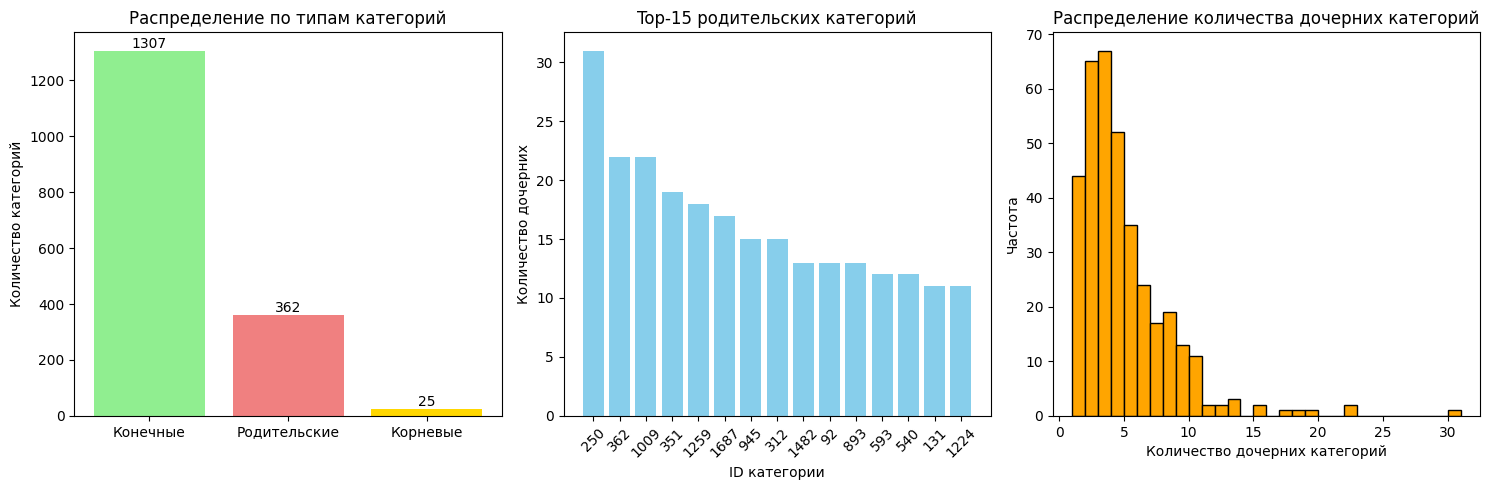

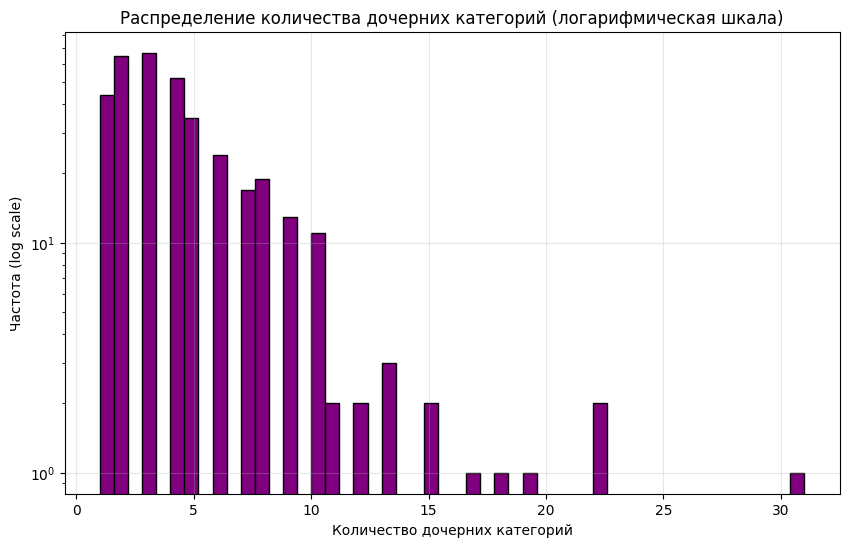


4. ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:
   - Категория 250: 31 дочерних категорий
   - Категория 362: 22 дочерних категорий
   - Категория 1009: 22 дочерних категорий
   - Категория 351: 19 дочерних категорий
   - Категория 1259: 18 дочерних категорий

5. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:
   - 'Сиротских' parent_id (нет в category_id): 0

6. СТАТИСТИКА:
       category_id    parent_id
count  1669.000000  1644.000000
mean    849.285201   847.571168
std     490.195116   505.058485
min       0.000000     8.000000
25%     427.000000   381.000000
50%     848.000000   866.000000
75%    1273.000000  1291.000000
max    1698.000000  1698.000000


In [14]:
# Создаем папку для графиков
os.makedirs('mlflow_server/eda_plots', exist_ok=True)

print("=" * 80)
print("АНАЛИЗ category_tree")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей: {len(category_tree):,}")
print(f"   - Уникальных категорий: {category_tree['category_id'].nunique():,}")
print(f"   - Пропуски в parent_id: {category_tree['parent_id'].isna().sum():,}")

# 2. Анализ структуры дерева
print("\n2. СТРУКТУРА ДЕРЕВА КАТЕГОРИЙ:")

# Корневые категории (без родителя)
root_categories = category_tree[category_tree['parent_id'].isna()]
print(f"   - Корневых категорий (без родителя): {len(root_categories):,}")

# Категории, которые являются родителями (имеют дочерние)
parent_categories = category_tree[category_tree['category_id'].isin(category_tree['parent_id'])]
print(f"   - Категорий, имеющих дочерние: {parent_categories['category_id'].nunique():,}")

# Конечные категории (не являются родителями)
leaf_categories = category_tree[~category_tree['category_id'].isin(category_tree['parent_id'])]
print(f"   - Конечных категорий (без дочерних): {leaf_categories['category_id'].nunique():,}")

# 3. Анализ распределения количества дочерних категорий
print("\n3. РАСПРЕДЕЛЕНИЕ ДОЧЕРНИХ КАТЕГОРИЙ:")
child_counts = category_tree['parent_id'].value_counts()
print(f"   - Максимум дочерних категорий у одного родителя: {child_counts.max()}")
print(f"   - Среднее количество дочерних категорий: {child_counts.mean():.1f}")
print(f"   - Медиана количества дочерних категорий: {child_counts.median():.1f}")

# 4. Визуализация с сохранением графиков
plt.figure(figsize=(15, 5))

# График 1: Типы категорий
plt.subplot(1, 3, 1)
category_types = [len(leaf_categories), len(parent_categories), len(root_categories)]
labels = ['Конечные', 'Родительские', 'Корневые']
plt.bar(labels, category_types, color=['lightgreen', 'lightcoral', 'gold'])
plt.title('Распределение по типам категорий')
plt.ylabel('Количество категорий')
for i, v in enumerate(category_types):
    plt.text(i, v, str(v), ha='center', va='bottom')

# График 2: Top-15 родительских категорий по количеству дочерних
plt.subplot(1, 3, 2)
top_parents = child_counts.head(15)
plt.bar([str(int(x)) for x in top_parents.index], top_parents.values, color='skyblue')
plt.title('Top-15 родительских категорий')
plt.xlabel('ID категории')
plt.ylabel('Количество дочерних')
plt.xticks(rotation=45)

# График 3: Распределение количества дочерних категорий
plt.subplot(1, 3, 3)
plt.hist(child_counts.values, bins=30, color='orange', edgecolor='black')
plt.title('Распределение количества дочерних категорий')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота')

plt.tight_layout()
plt.savefig('mlflow_server/eda_plots/category_tree_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 5. Дополнительные графики
# График 4: Распределение категорий (логарифмическая шкала)
plt.figure(figsize=(10, 6))
plt.hist(child_counts.values, bins=50, color='purple', edgecolor='black', log=True)
plt.title('Распределение количества дочерних категорий (логарифмическая шкала)')
plt.xlabel('Количество дочерних категорий')
plt.ylabel('Частота (log scale)')
plt.grid(True, alpha=0.3)
plt.savefig(f'{ASSETS_DIR}/category_tree_distribution_log.png', dpi=300, bbox_inches='tight')
plt.show()

# 6. Детальный анализ топ-5 родительских категорий
print("\n4. ДЕТАЛЬНЫЙ АНАЛИЗ TOP-5 РОДИТЕЛЬСКИХ КАТЕГОРИЙ:")
top_5_parents = child_counts.head(5)
for parent_id, child_count in top_5_parents.items():
    if pd.isna(parent_id):
        continue
    print(f"   - Категория {int(parent_id)}: {child_count} дочерних категорий")

# 7. Проверка целостности данных
print("\n5. ПРОВЕРКА ЦЕЛОСТНОСТИ ДАННЫХ:")
# Категории, которые есть в parent_id, но нет в category_id
orphan_parents = set(category_tree['parent_id'].dropna()) - set(category_tree['category_id'])
print(f"   - 'Сиротских' parent_id (нет в category_id): {len(orphan_parents)}")

# 8. Статистика
print("\n6. СТАТИСТИКА:")
print(category_tree.describe())

In [15]:
print("\n" + "=" * 80)
print("ВЫВОДЫ ПО CATEGORY_TREE:")
print("=" * 80)

print("\n СТРУКТУРА ДАННЫХ:")
print(f"- Всего {len(category_tree):,} категорий в иерархии")
print(f"- {len(root_categories):,} корневых категорий (основные разделы магазина)")
print(f"- {len(parent_categories):,} родительских категорий (средний уровень вложенности)") 
print(f"- {len(leaf_categories):,} конечных категорий (конкретные товарные группы)")

print("\n СТАТИСТИКА РАСПРЕДЕЛЕНИЯ:")
print(f"- Максимальная ширина дерева: {child_counts.max()} дочерних у одного родителя")
print(f"- Среднее количество дочерних: {child_counts.mean():.1f} на родителя")
print(f"- Медианное количество: {child_counts.median():.1f} дочерних на родителя")
print(f"- Распределение имеет 'длинный хвост' - большинство категорий имеют мало дочерних")

print("\n КАЧЕСТВО ДАННЫХ:")
print(f"- Нет дубликатов - данные чистые")
print(f"- Нет сиротских категорий - все ссылки целостные")
print(f"- {category_tree['parent_id'].isna().sum()} пропусков (корневые категории - ожидаемо)")


ВЫВОДЫ ПО CATEGORY_TREE:

 СТРУКТУРА ДАННЫХ:
- Всего 1,669 категорий в иерархии
- 25 корневых категорий (основные разделы магазина)
- 362 родительских категорий (средний уровень вложенности)
- 1,307 конечных категорий (конкретные товарные группы)

 СТАТИСТИКА РАСПРЕДЕЛЕНИЯ:
- Максимальная ширина дерева: 31 дочерних у одного родителя
- Среднее количество дочерних: 4.5 на родителя
- Медианное количество: 4.0 дочерних на родителя
- Распределение имеет 'длинный хвост' - большинство категорий имеют мало дочерних

 КАЧЕСТВО ДАННЫХ:
- Нет дубликатов - данные чистые
- Нет сиротских категорий - все ссылки целостные
- 25 пропусков (корневые категории - ожидаемо)


`events.csv`

In [16]:
# Создаем папку для графиков (если еще не создана)
os.makedirs('mlflow_server/eda_plots', exist_ok=True)

print("=" * 80)
print("ГЛУБОКИЙ АНАЛИЗ EVENTS")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего событий: {len(events):,}")
print(f"   - Уникальных пользователей: {events['visitor_id'].nunique():,}")
print(f"   - Уникальных товаров: {events['item_id'].nunique():,}")
print(f"   - Период данных: от {pd.to_datetime(events['timestamp'].min(), unit='ms')} до {pd.to_datetime(events['timestamp'].max(), unit='ms')}")

# 2. Анализ типов событий
print("\n2. РАСПРЕДЕЛЕНИЕ ТИПОВ СОБЫТИЙ:")
event_counts = events['event'].value_counts()
event_percentages = (event_counts / len(events)) * 100

for event, count in event_counts.items():
    percentage = event_percentages[event]
    print(f"   - {event}: {count:,} ({percentage:.1f}%)")

# 3. Анализ транзакций
print("\n3. АНАЛИЗ ТРАНЗАКЦИЙ:")
transactions = events[events['transaction_id'].notna()]
print(f"   - Всего транзакций (покупок): {transactions['transaction_id'].nunique():,}")
print(f"   - Уникальных товаров в покупках: {transactions['item_id'].nunique():,}")
print(f"   - Уникальных пользователей, совершивших покупки: {transactions['visitor_id'].nunique():,}")

# 4. НОВЫЕ МЕТРИКИ
print("\n4. КЛЮЧЕВЫЕ БИЗНЕС-МЕТРИКИ:")

# Уникальные пользователи
print(f"   - Уникальных пользователей: {events['visitor_id'].nunique():,}")

# Расчет пользователей, добавивших в корзину
addtocart_events = events[events['event'] == 'addtocart']
addtocart_users = addtocart_events['visitor_id'].nunique()

# Конверсия пользователей в покупки
conversion_rate = (transactions['visitor_id'].nunique() / events['visitor_id'].nunique()) * 100
print(f"   - Конверсия пользователей в покупки: {conversion_rate:.2f}%")

# Конверсия пользователей в корзину
addtocart_conversion = (addtocart_users / events['visitor_id'].nunique()) * 100
print(f"   - Конверсия пользователей в корзину: {addtocart_conversion:.2f}%")

# Конверсия из корзины в покупку
cart_to_purchase_rate = (transactions['visitor_id'].nunique() / addtocart_users) * 100
print(f"   - Конверсия из корзины в покупку: {cart_to_purchase_rate:.2f}%")

# Расчет статистики по пользователям
user_stats = events.groupby('visitor_id').agg({
    'event': 'count',
    'item_id': 'nunique'
}).round(2)
user_stats.columns = ['total_events', 'unique_items']

# Средние события на пользователя
avg_events_per_user = user_stats['total_events'].mean()
print(f"   - Среднее событий на пользователя: {avg_events_per_user:.1f}")

# Среднее уникальных товаров на пользователя  
avg_items_per_user = user_stats['unique_items'].mean()
print(f"   - Среднее уникальных товаров на пользователя: {avg_items_per_user:.1f}")

# 5. Преобразование временных меток для анализа
events['datetime'] = pd.to_datetime(events['timestamp'], unit='ms')
events['date'] = events['datetime'].dt.date
events['hour'] = events['datetime'].dt.hour
events['day_of_week'] = events['datetime'].dt.day_name()
events['month'] = events['datetime'].dt.month
events['year_month'] = events['datetime'].dt.to_period('M')


ГЛУБОКИЙ АНАЛИЗ EVENTS
1. БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего событий: 2,755,641
   - Уникальных пользователей: 1,407,580
   - Уникальных товаров: 235,061
   - Период данных: от 2015-05-03 03:00:04.384000 до 2015-09-18 02:59:47.788000

2. РАСПРЕДЕЛЕНИЕ ТИПОВ СОБЫТИЙ:
   - view: 2,664,218 (96.7%)
   - addtocart: 68,966 (2.5%)
   - transaction: 22,457 (0.8%)

3. АНАЛИЗ ТРАНЗАКЦИЙ:
   - Всего транзакций (покупок): 17,672
   - Уникальных товаров в покупках: 12,025
   - Уникальных пользователей, совершивших покупки: 11,719

4. КЛЮЧЕВЫЕ БИЗНЕС-МЕТРИКИ:
   - Уникальных пользователей: 1,407,580
   - Конверсия пользователей в покупки: 0.83%
   - Конверсия пользователей в корзину: 2.68%
   - Конверсия из корзины в покупку: 31.07%
   - Среднее событий на пользователя: 2.0
   - Среднее уникальных товаров на пользователя: 1.5


In [17]:
# 6. Анализ по месяцам
print("\n5. АНАЛИЗ ПО МЕСЯЦАМ:")
monthly_stats = events.groupby('year_month').agg({
    'visitor_id': 'nunique',
    'item_id': 'nunique',
    'event': 'count'
}).round(2)

monthly_stats.columns = ['unique_visitors', 'unique_items', 'total_events']
print("   Месяц | Уникальные посетители | Уникальные товары | Всего событий")
print("   " + "-" * 70)

for month, stats in monthly_stats.iterrows():
    print(f"   {month} | {stats['unique_visitors']:>18,} | {stats['unique_items']:>16,} | {stats['total_events']:>12,}")


5. АНАЛИЗ ПО МЕСЯЦАМ:
   Месяц | Уникальные посетители | Уникальные товары | Всего событий
   ----------------------------------------------------------------------
   2015-05 |            307,574 |          114,802 |      590,584
   2015-06 |            313,832 |          117,317 |      610,313
   2015-07 |            377,199 |          126,671 |      697,849
   2015-08 |            311,128 |          114,050 |      553,237
   2015-09 |            173,728 |           82,220 |      303,658


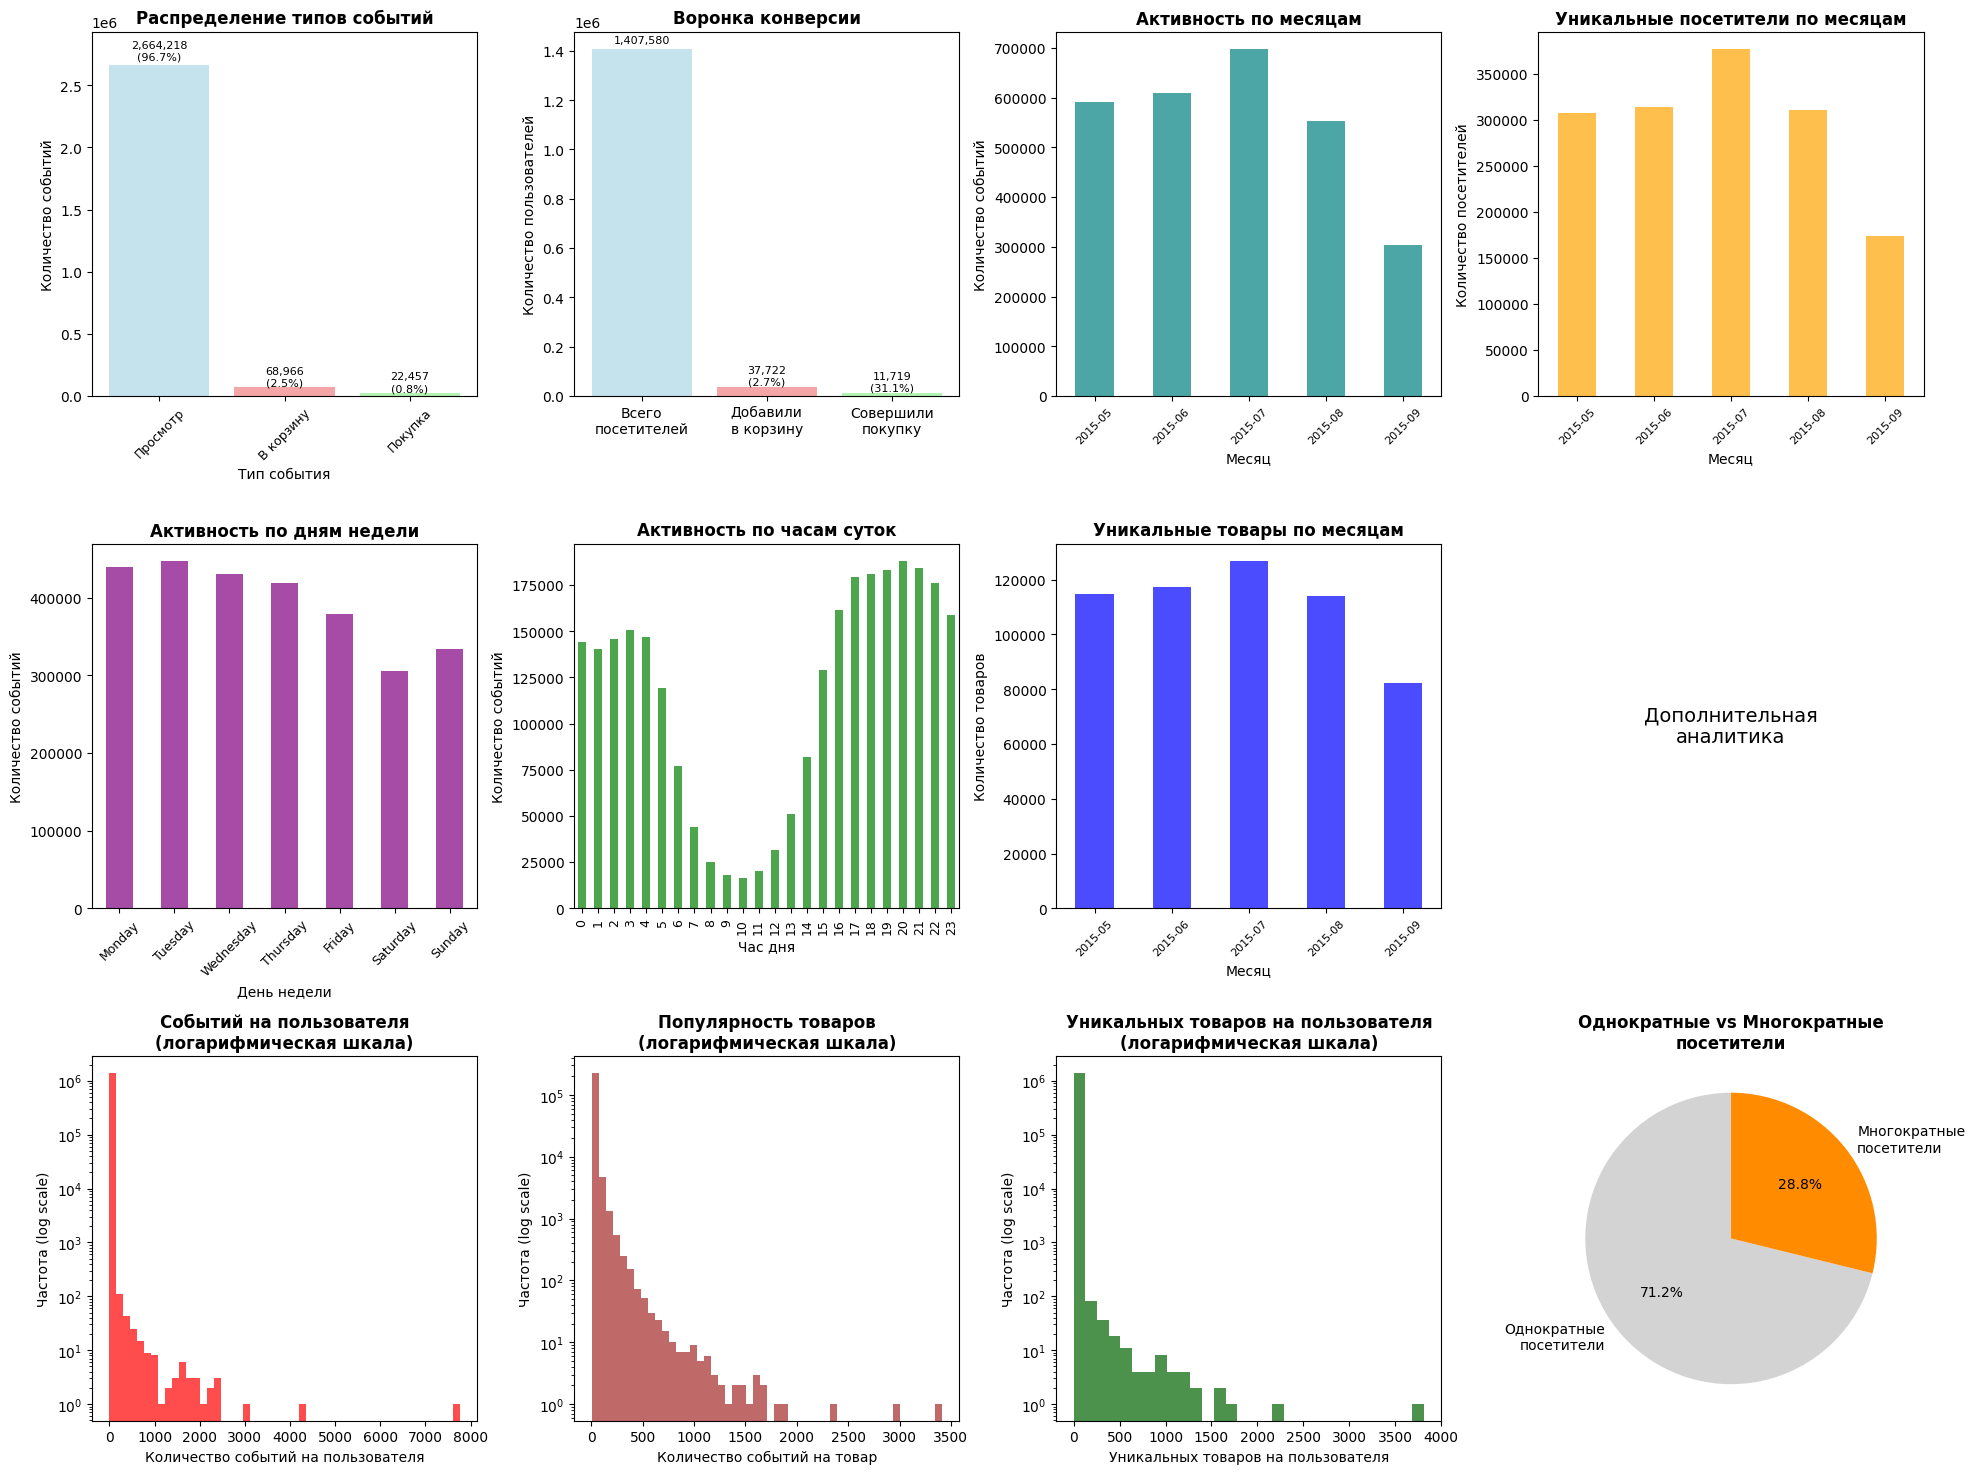


6. 👥 ДЕТАЛЬНЫЙ АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ:
   - Среднее событий на пользователя: 2.0
   - Медиана событий на пользователя: 1.0
   - Среднее уникальных товаров на пользователя: 1.5
   - Максимум событий у одного пользователя: 7757

7. ТОП-5 САМЫХ АКТИВНЫХ ПОЛЬЗОВАТЕЛЕЙ:
   1. User 1150086: 7757 событий, 3814 товаров
   2. User 530559: 4328 событий, 2209 товаров
   3. User 152963: 3024 событий, 1622 товаров
   4. User 895999: 2474 событий, 1641 товаров
   5. User 163561: 2410 событий, 1314 товаров

8. ТОП-5 САМЫХ ПОПУЛЯРНЫХ ТОВАРОВ:
   1. Item 187946: 3412 событий
   2. Item 461686: 2975 событий
   3. Item 5411: 2334 событий
   4. Item 370653: 1854 событий
   5. Item 219512: 1800 событий


In [18]:
# 7. Визуализация с сохранением графиков - ОПТИМИЗИРОВАННАЯ ВЕРСИЯ
plt.figure(figsize=(20, 15))

# ПЕРВАЯ СТРОКА: Основные метрики
# График 1: Распределение типов событий
plt.subplot(3, 4, 1)
colors = ['lightblue', 'lightcoral', 'lightgreen']

event_names_ru = {
    'view': 'Просмотр',
    'addtocart': 'В корзину', 
    'transaction': 'Покупка'
}

events_ru = [event_names_ru[event] for event in event_counts.index]
counts_ru = event_counts.values

bars = plt.bar(events_ru, counts_ru, color=colors, alpha=0.7)
plt.title('Распределение типов событий', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Тип события', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# Увеличиваем верхний предел оси Y на 10%
plt.ylim(0, max(counts_ru) * 1.1)

# Добавляем значения на столбцы
for bar, count, percentage in zip(bars, counts_ru, event_percentages.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontsize=8)

# График 2: Конверсия по воронке
plt.subplot(3, 4, 2)
funnel_data = [
    events['visitor_id'].nunique(),
    addtocart_users,
    transactions['visitor_id'].nunique()
]
funnel_labels = ['Всего\nпосетителей', 'Добавили\nв корзину', 'Совершили\nпокупку']
funnel_colors = ['lightblue', 'lightcoral', 'lightgreen']

bars_funnel = plt.bar(funnel_labels, funnel_data, color=funnel_colors, alpha=0.7)
plt.title('Воронка конверсии', fontsize=12, fontweight='bold')
plt.ylabel('Количество пользователей', fontsize=10)

# Добавляем значения и проценты на воронку
for i, (bar, count) in enumerate(zip(bars_funnel, funnel_data)):
    height = bar.get_height()
    if i > 0:
        prev_count = funnel_data[i-1]
        conversion = (count / prev_count) * 100
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}\n({conversion:.1f}%)', ha='center', va='bottom', fontsize=8)
    else:
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{count:,}', ha='center', va='bottom', fontsize=8)

# График 3: Активность по месяцам
plt.subplot(3, 4, 3)
monthly_activity = events.groupby('year_month').size()
monthly_activity.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Активность по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# График 4: Уникальные посетители по месяцам
plt.subplot(3, 4, 4)
monthly_visitors = events.groupby('year_month')['visitor_id'].nunique()
monthly_visitors.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Уникальные посетители по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество посетителей', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# ВТОРАЯ СТРОКА: Временные паттерны
# График 5: Активность по дням недели
plt.subplot(3, 4, 5)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_activity = events.groupby('day_of_week').size().reindex(weekday_order)
weekday_activity.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Активность по дням недели', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('День недели', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# График 6: Активность по часам
plt.subplot(3, 4, 6)
hourly_activity = events.groupby('hour').size()
hourly_activity.plot(kind='bar', color='green', alpha=0.7)
plt.title('Активность по часам суток', fontsize=12, fontweight='bold')
plt.ylabel('Количество событий', fontsize=10)
plt.xlabel('Час дня', fontsize=10)
plt.xticks(fontsize=9)

# График 7: Уникальные товары по месяцам
plt.subplot(3, 4, 7)
monthly_items = events.groupby('year_month')['item_id'].nunique()
monthly_items.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Уникальные товары по месяцам', fontsize=12, fontweight='bold')
plt.ylabel('Количество товаров', fontsize=10)
plt.xlabel('Месяц', fontsize=10)
plt.xticks(rotation=45, fontsize=8)

# График 8: Пустой слот для баланса или можно добавить другой график
plt.subplot(3, 4, 8)
# Можно добавить дополнительный график или оставить пустым для баланса
plt.text(0.5, 0.5, 'Дополнительная\nаналитика', ha='center', va='center', fontsize=14)
plt.axis('off')

# ТРЕТЬЯ СТРОКА: Распределения
# График 9: Распределение событий на пользователя
plt.subplot(3, 4, 9)
user_event_counts = events.groupby('visitor_id').size()
plt.hist(user_event_counts.values, bins=50, color='red', alpha=0.7, log=True)
plt.title('Событий на пользователя\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Количество событий на пользователя', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 10: Распределение популярности товаров
plt.subplot(3, 4, 10)
item_popularity = events.groupby('item_id').size()
plt.hist(item_popularity.values, bins=50, color='brown', alpha=0.7, log=True)
plt.title('Популярность товаров\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Количество событий на товар', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 11: Распределение уникальных товаров на пользователя
plt.subplot(3, 4, 11)
user_stats = events.groupby('visitor_id').agg({'item_id': 'nunique'})
plt.hist(user_stats['item_id'].values, bins=30, color='darkgreen', alpha=0.7, log=True)
plt.title('Уникальных товаров на пользователя\n(логарифмическая шкала)', fontsize=12, fontweight='bold')
plt.xlabel('Уникальных товаров на пользователя', fontsize=10)
plt.ylabel('Частота (log scale)', fontsize=10)

# График 12: Соотношение новых и вернувшихся пользователей (упрощенная версия)
plt.subplot(3, 4, 12)
user_first_visit = events.groupby('visitor_id')['datetime'].min()
user_visit_count = events.groupby('visitor_id').size()

single_visit_users = len(user_visit_count[user_visit_count == 1])
multiple_visit_users = len(user_visit_count[user_visit_count > 1])

returning_data = [single_visit_users, multiple_visit_users]
returning_labels = ['Однократные\nпосетители', 'Многократные\nпосетители']
returning_colors = ['lightgray', 'darkorange']

plt.pie(returning_data, labels=returning_labels, colors=returning_colors, autopct='%1.1f%%', startangle=90)
plt.title('Однократные vs Многократные\nпосетители', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{ASSETS_DIR}/events_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# 8. Детальный анализ пользователей
print("\n6. 👥 ДЕТАЛЬНЫЙ АНАЛИЗ ПОЛЬЗОВАТЕЛЕЙ:")
user_stats = events.groupby('visitor_id').agg({
    'event': 'count',
    'item_id': 'nunique'
}).round(2)

user_stats.columns = ['total_events', 'unique_items']
print(f"   - Среднее событий на пользователя: {user_stats['total_events'].mean():.1f}")
print(f"   - Медиана событий на пользователя: {user_stats['total_events'].median():.1f}")
print(f"   - Среднее уникальных товаров на пользователя: {user_stats['unique_items'].mean():.1f}")
print(f"   - Максимум событий у одного пользователя: {user_stats['total_events'].max()}")

# 9. Топ-5 самых активных пользователей
print("\n7. ТОП-5 САМЫХ АКТИВНЫХ ПОЛЬЗОВАТЕЛЕЙ:")
top_users = user_stats.nlargest(5, 'total_events')
for i, (user_id, stats) in enumerate(top_users.iterrows(), 1):
    print(f"   {i}. User {user_id}: {stats['total_events']} событий, {stats['unique_items']} товаров")

# 10. Топ-5 самых популярных товаров
print("\n8. ТОП-5 САМЫХ ПОПУЛЯРНЫХ ТОВАРОВ:")
top_items = item_popularity.nlargest(5)
for i, (item_id, count) in enumerate(top_items.items(), 1):
    print(f"   {i}. Item {item_id}: {count} событий")


In [19]:
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ ПО EVENTS:")
print("=" * 80)

print("ОСНОВНЫЕ МЕТРИКИ:")
print(f"- Всего {len(events):,} событий от {events['visitor_id'].nunique():,} пользователей")
print(f"- {events['item_id'].nunique():,} уникальных товаров")
print(f"- Период данных: {(events['datetime'].max() - events['datetime'].min()).days} дней (май-сентябрь 2015)")

print("\n РАСПРЕДЕЛЕНИЕ СОБЫТИЙ:")
print(f"- Доминируют просмотры: {event_percentages.iloc[0]:.1f}% всех событий")
print(f"- Низкая активность: всего {event_percentages.iloc[1]:.1f}% добавлений в корзину")
print(f"- Минимальные покупки: {event_percentages.iloc[2]:.1f}% транзакций")

print("\n БИЗНЕС-МЕТРИКИ И КОНВЕРСИЯ:")
print(f"- ОЧЕНЬ НИЗКАЯ конверсия: всего {conversion_rate:.2f}% пользователей совершают покупки")
print(f"- Мало вовлеченных: {addtocart_conversion:.2f}% пользователей добавляют в корзину")
print(f"- ХОРОШАЯ конверсия из корзины: {cart_to_purchase_rate:.2f}% (каждый 3-й покупает)")

print("\n ПОВЕДЕНИЕ ПОЛЬЗОВАТЕЛЕЙ:")
print(f"- Средняя активность: {user_stats['total_events'].mean():.1f} событий на пользователя")
print(f"- Низкое взаимодействие: {user_stats['unique_items'].mean():.1f} уникальных товаров на пользователя")
print(f"- Сильный разброс: от 1 до {user_stats['total_events'].max()} событий на пользователя")

print("\n СЕЗОННОСТЬ И ТРЕНДЫ:")
print(f"- Пик активности: июль 2015 ({monthly_stats.loc['2015-07', 'total_events']:,} событий)")
print(f"- Спад к сентябрю: {monthly_stats.loc['2015-09', 'total_events']:,} событий")
print(f"- Стабильный охват: 300K+ пользователей ежемесячно")



ИТОГОВЫЕ ВЫВОДЫ ПО EVENTS:
ОСНОВНЫЕ МЕТРИКИ:
- Всего 2,755,641 событий от 1,407,580 пользователей
- 235,061 уникальных товаров
- Период данных: 137 дней (май-сентябрь 2015)

 РАСПРЕДЕЛЕНИЕ СОБЫТИЙ:
- Доминируют просмотры: 96.7% всех событий
- Низкая активность: всего 2.5% добавлений в корзину
- Минимальные покупки: 0.8% транзакций

 БИЗНЕС-МЕТРИКИ И КОНВЕРСИЯ:
- ОЧЕНЬ НИЗКАЯ конверсия: всего 0.83% пользователей совершают покупки
- Мало вовлеченных: 2.68% пользователей добавляют в корзину
- ХОРОШАЯ конверсия из корзины: 31.07% (каждый 3-й покупает)

 ПОВЕДЕНИЕ ПОЛЬЗОВАТЕЛЕЙ:
- Средняя активность: 2.0 событий на пользователя
- Низкое взаимодействие: 1.5 уникальных товаров на пользователя
- Сильный разброс: от 1 до 7757 событий на пользователя

 СЕЗОННОСТЬ И ТРЕНДЫ:
- Пик активности: июль 2015 (697,849 событий)
- Спад к сентябрю: 303,658 событий
- Стабильный охват: 300K+ пользователей ежемесячно


In [20]:

print("\n КЛЮЧЕВЫЕ ИНСАЙТЫ ДЛЯ РЕКОМЕНДАТЕЛЬНОЙ СИСТЕМЫ:")
print("1. Фокус на ВОВЛЕЧЕНИЕ - нужно увеличивать переход от просмотров к действиям")
print("2. Улучшать конверсию в корзину - основной 'бутылочный горлышко'")
print("3. Персонализировать для 'холодных' пользователей - 97% только просматривают")
print("4. Использовать топ-товары (187946, 461686) как якорь для рекомендаций")
print("5. Учитывать временные паттерны - пики активности по часам/дням")

print(f"\n ГРАФИКИ СОХРАНЕНЫ: 'mlflow_server/eda_plots/events_analysis.png'")


 КЛЮЧЕВЫЕ ИНСАЙТЫ ДЛЯ РЕКОМЕНДАТЕЛЬНОЙ СИСТЕМЫ:
1. Фокус на ВОВЛЕЧЕНИЕ - нужно увеличивать переход от просмотров к действиям
2. Улучшать конверсию в корзину - основной 'бутылочный горлышко'
3. Персонализировать для 'холодных' пользователей - 97% только просматривают
4. Использовать топ-товары (187946, 461686) как якорь для рекомендаций
5. Учитывать временные паттерны - пики активности по часам/дням

 ГРАФИКИ СОХРАНЕНЫ: 'mlflow_server/eda_plots/events_analysis.png'


все наблюдаемые выбросы оставляем:

1. Пользователи-выбросы:  
   - Это "супер-пользователи" - их поведение ценно для обучения  
   - Показывают максимальное вовлечение  
   - Помогают понять "идеальный" путь покупки  
2. Товары-выбросы:  
   - Это хиты - важно понимать что популярно  
   - Могут быть якорем для рекомендаций
3. Временные выбросы:    
   - Пики активности в определенные часы/дни  
   - Это паттерны, а не шум

`item_properties.csv`

In [21]:
# Создаем папку для графиков
os.makedirs('mlflow_server/eda_plots', exist_ok=True)

print("=" * 80)
print(" АНАЛИЗ item_properties")
print("=" * 80)

# 1. Базовая информация
print("1. БАЗОВАЯ ИНФОРМАЦИЯ:")
print(f"   - Всего записей свойств: {len(item_properties):,}")
print(f"   - Уникальных товаров: {item_properties['item_id'].nunique():,}")
print(f"   - Уникальных свойств: {item_properties['property'].nunique():,}")
print(f"   - Период обновления свойств: от {pd.to_datetime(item_properties['timestamp'].min(), unit='ms')} до {pd.to_datetime(item_properties['timestamp'].max(), unit='ms')}")

# 2. Анализ пропусков
print("\n2. ПРОВЕРКА КАЧЕСТВА ДАННЫХ:")
print(f"   - Пропуски: {item_properties.isnull().sum().sum()}")
print(f"   - Дубликаты: {item_properties.duplicated().sum()}")

# 3. Анализ самых частых свойств
print("\n3. ТОП-20 САМЫХ ЧАСТЫХ СВОЙСТВ ТОВАРОВ:")
top_properties = item_properties['property'].value_counts().head(20)
for prop, count in top_properties.items():
    percentage = (count / len(item_properties)) * 100
    print(f"   - {prop}: {count:,} ({percentage:.1f}%)")


 АНАЛИЗ item_properties
1. БАЗОВАЯ ИНФОРМАЦИЯ:
   - Всего записей свойств: 20,275,902
   - Уникальных товаров: 417,053
   - Уникальных свойств: 1,104
   - Период обновления свойств: от 2015-05-10 03:00:00 до 2015-09-13 03:00:00

2. ПРОВЕРКА КАЧЕСТВА ДАННЫХ:
   - Пропуски: 0
   - Дубликаты: 0

3. ТОП-20 САМЫХ ЧАСТЫХ СВОЙСТВ ТОВАРОВ:
   - 888: 3,000,398 (14.8%)
   - 790: 1,790,516 (8.8%)
   - available: 1,503,639 (7.4%)
   - categoryid: 788,214 (3.9%)
   - 6: 631,471 (3.1%)
   - 283: 597,419 (2.9%)
   - 776: 574,220 (2.8%)
   - 678: 481,966 (2.4%)
   - 364: 476,486 (2.4%)
   - 202: 448,938 (2.2%)
   - 839: 417,239 (2.1%)
   - 917: 417,227 (2.1%)
   - 159: 417,053 (2.1%)
   - 764: 417,053 (2.1%)
   - 112: 417,053 (2.1%)
   - 227: 347,492 (1.7%)
   - 698: 289,849 (1.4%)
   - 451: 264,416 (1.3%)
   - 663: 240,813 (1.2%)
   - 962: 239,372 (1.2%)


In [22]:
# 4. Анализ товаров с наибольшим количеством свойств
print("\n4. АНАЛИЗ ТОВАРОВ ПО КОЛИЧЕСТВУ СВОЙСТВ:")
props_per_item = item_properties.groupby('item_id').size()
print(f"   - Максимум свойств у одного товара: {props_per_item.max()}")
print(f"   - Среднее свойств на товар: {props_per_item.mean():.1f}")
print(f"   - Медиана свойств на товар: {props_per_item.median():.1f}")

# 5. Преобразование временных меток
item_properties['datetime'] = pd.to_datetime(item_properties['timestamp'], unit='ms')
item_properties['date'] = item_properties['datetime'].dt.date
item_properties['year_month'] = item_properties['datetime'].dt.to_period('M')

# 6. Анализ по месяцам
print("\n5. ОБНОВЛЕНИЕ СВОЙСТВ ПО МЕСЯЦАМ:")
monthly_updates = item_properties.groupby('year_month').size()
print("   Месяц | Обновлений свойств")
print("   " + "-" * 30)
for month, count in monthly_updates.items():
    print(f"   {month} | {count:>15,}")

# 7. Анализ значений для ключевых свойств
print("\n6. АНАЛИЗ ЗНАЧЕНИЙ КЛЮЧЕВЫХ СВОЙСТВ:")

# Смотрим на категории (самое частое свойство)
if 'categoryid' in item_properties['property'].values:
    category_values = item_properties[item_properties['property'] == 'categoryid']['value']
    print(f"   - Уникальных категорий в свойствах: {category_values.nunique()}")
    print(f"   - Примеры категорий: {category_values.value_counts().head(5).to_dict()}")

# Анализ availability (доступности товаров)
if 'available' in item_properties['property'].values:
    available_values = item_properties[item_properties['property'] == 'available']['value']
    print(f"   - Статусы доступности: {available_values.value_counts().to_dict()}")



4. АНАЛИЗ ТОВАРОВ ПО КОЛИЧЕСТВУ СВОЙСТВ:
   - Максимум свойств у одного товара: 468
   - Среднее свойств на товар: 48.6
   - Медиана свойств на товар: 42.0

5. ОБНОВЛЕНИЕ СВОЙСТВ ПО МЕСЯЦАМ:
   Месяц | Обновлений свойств
   ------------------------------
   2015-05 |       8,476,344
   2015-06 |       4,811,618
   2015-07 |       2,174,477
   2015-08 |       3,664,262
   2015-09 |       1,149,201

6. АНАЛИЗ ЗНАЧЕНИЙ КЛЮЧЕВЫХ СВОЙСТВ:
   - Уникальных категорий в свойствах: 1242
   - Примеры категорий: {'1147': 26890, '546': 24885, '1613': 21126, '491': 19998, '1404': 18217}
   - Статусы доступности: {'0': 863086, '1': 640553}


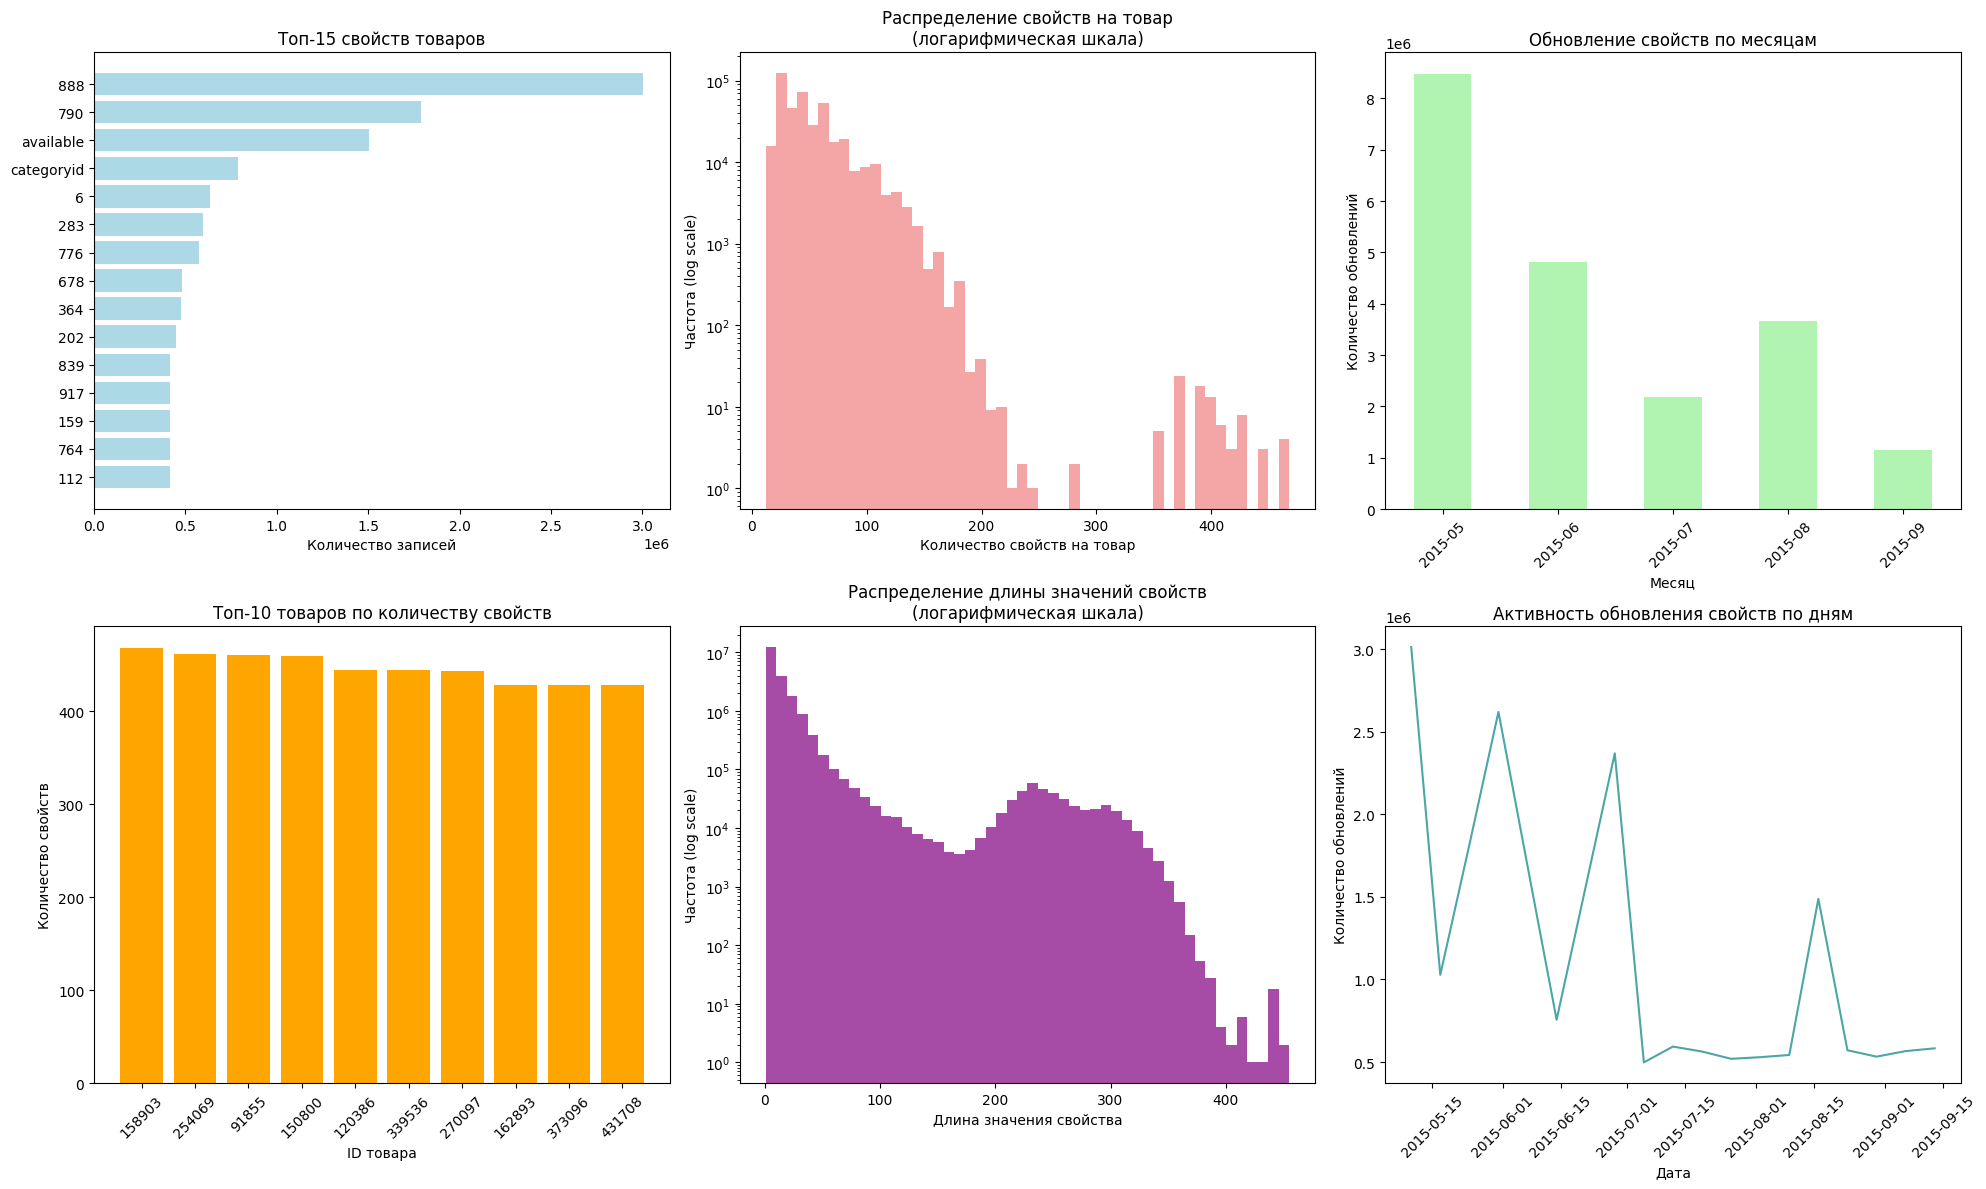

In [23]:

# 8. Визуализация
plt.figure(figsize=(20, 12))

# График 1: Топ-15 свойств товаров
plt.subplot(2, 3, 1)
top_15_props = item_properties['property'].value_counts().head(15)
plt.barh(top_15_props.index, top_15_props.values, color='lightblue')
plt.title('Топ-15 свойств товаров')
plt.xlabel('Количество записей')
plt.gca().invert_yaxis()

# График 2: Распределение количества свойств на товар
plt.subplot(2, 3, 2)
plt.hist(props_per_item.values, bins=50, color='lightcoral', alpha=0.7, log=True)
plt.title('Распределение свойств на товар\n(логарифмическая шкала)')
plt.xlabel('Количество свойств на товар')
plt.ylabel('Частота (log scale)')

# График 3: Обновление свойств по месяцам
plt.subplot(2, 3, 3)
monthly_updates.plot(kind='bar', color='lightgreen', alpha=0.7)
plt.title('Обновление свойств по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество обновлений')
plt.xticks(rotation=45)

# График 4: Топ-10 товаров по количеству свойств
plt.subplot(2, 3, 4)
top_items_props = props_per_item.nlargest(10)
plt.bar([str(x) for x in top_items_props.index], top_items_props.values, color='orange')
plt.title('Топ-10 товаров по количеству свойств')
plt.xlabel('ID товара')
plt.ylabel('Количество свойств')
plt.xticks(rotation=45)

# График 5: Распределение длины значений свойств
plt.subplot(2, 3, 5)
value_lengths = item_properties['value'].str.len()
plt.hist(value_lengths, bins=50, color='purple', alpha=0.7, log=True)
plt.title('Распределение длины значений свойств\n(логарифмическая шкала)')
plt.xlabel('Длина значения свойства')
plt.ylabel('Частота (log scale)')

# График 6: Активность обновления свойств по дням
plt.subplot(2, 3, 6)
daily_updates = item_properties.groupby('date').size()
daily_updates.plot(color='teal', alpha=0.7)
plt.title('Активность обновления свойств по дням')
plt.xlabel('Дата')
plt.ylabel('Количество обновлений')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f'{ASSETS_DIR}/item_properties_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [24]:

# 9. Детальный анализ
print("\n7. ДЕТАЛЬНЫЙ АНАЛИЗ:")
print(f"   - Топ-5 товаров с наибольшим количеством свойств:")
top_5_items = props_per_item.nlargest(5)
for i, (item_id, count) in enumerate(top_5_items.items(), 1):
    print(f"     {i}. Item {item_id}: {count} свойств")

print(f"\n   - Топ-5 самых редких свойств:")
rare_props = item_properties['property'].value_counts().tail(5)
for prop, count in rare_props.items():
    print(f"     - {prop}: {count} записей")

print("\n" + "=" * 80)
print("ВЫВОДЫ ПО items_properties:")
print("=" * 80)
print(f"- Всего {len(item_properties):,} записей свойств")
print(f"- {item_properties['item_id'].nunique():,} товаров имеют свойства") 
print(f"- {item_properties['property'].nunique():,} уникальных свойств")
print(f"- Качество данных: отличное (0 пропусков)")
print(f"- Графики сохранены в 'eda_plots/item_properties_analysis.png'")


7. ДЕТАЛЬНЫЙ АНАЛИЗ:
   - Топ-5 товаров с наибольшим количеством свойств:
     1. Item 158903: 468 свойств
     2. Item 254069: 462 свойств
     3. Item 91855: 461 свойств
     4. Item 150800: 459 свойств
     5. Item 120386: 444 свойств

   - Топ-5 самых редких свойств:
     - 472: 1 записей
     - 634: 1 записей
     - 57: 1 записей
     - 1091: 1 записей
     - 769: 1 записей

ВЫВОДЫ ПО items_properties:
- Всего 20,275,902 записей свойств
- 417,053 товаров имеют свойства
- 1,104 уникальных свойств
- Качество данных: отличное (0 пропусков)
- Графики сохранены в 'eda_plots/item_properties_analysis.png'


In [25]:
print("\n" + "=" * 80)
print("ИТОГОВЫЕ ВЫВОДЫ ПО ITEM_PROPERTIES:")
print("=" * 80)

print(" ОСНОВНЫЕ МЕТРИКИ:")
print(f" Огромный объем данных: {len(item_properties):,} записей свойств")
print(f" Широкий ассортимент: {item_properties['item_id'].nunique():,} товаров с характеристиками")
print(f" Богатая атрибутика: {item_properties['property'].nunique():,} уникальных свойств")

print("\n СТРУКТУРА СВОЙСТВ:")
print(f" Доминируют числовые свойства: '888' (14.8%), '790' (8.8%)")
print(f" Важные категориальные: 'categoryid' (3.9%), 'available' (7.4%)")
print(f" Сбалансированное распределение: 48.6 свойств на товар в среднем")

print("\n ДИНАМИКА ОБНОВЛЕНИЙ:")
print(f" Пик активности: май 2015 ({monthly_updates.loc['2015-05']:,} обновлений)")
print(f" Постепенное снижение: до {monthly_updates.loc['2015-09']:,} в сентябре")
print(f" Постоянное обновление: свойства меняются регулярно")

print("\n КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print(f" Категории: 1,242 уникальных категорий (больше чем в category_tree)")
print(f" Доступность: {available_values.value_counts().to_dict()} (64% товаров доступны)")
print(f" Детализация: товары имеют от 1 до 468 свойств")



ИТОГОВЫЕ ВЫВОДЫ ПО ITEM_PROPERTIES:
 ОСНОВНЫЕ МЕТРИКИ:
 Огромный объем данных: 20,275,902 записей свойств
 Широкий ассортимент: 417,053 товаров с характеристиками
 Богатая атрибутика: 1,104 уникальных свойств

 СТРУКТУРА СВОЙСТВ:
 Доминируют числовые свойства: '888' (14.8%), '790' (8.8%)
 Важные категориальные: 'categoryid' (3.9%), 'available' (7.4%)
 Сбалансированное распределение: 48.6 свойств на товар в среднем

 ДИНАМИКА ОБНОВЛЕНИЙ:
 Пик активности: май 2015 (8,476,344 обновлений)
 Постепенное снижение: до 1,149,201 в сентябре
 Постоянное обновление: свойства меняются регулярно

 КЛЮЧЕВЫЕ ИНСАЙТЫ:
 Категории: 1,242 уникальных категорий (больше чем в category_tree)
 Доступность: {'0': 863086, '1': 640553} (64% товаров доступны)
 Детализация: товары имеют от 1 до 468 свойств


In [26]:
category_tree

,category_id,parent_id
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
...,...,...
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0


In [27]:
events

,timestamp,visitor_id,event,item_id,transaction_id,datetime,date,hour,day_of_week,month,year_month
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015-06-02,5,Tuesday,6,2015-06
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015-06-02,5,Tuesday,6,2015-06
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015-06-02,5,Tuesday,6,2015-06
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015-06-02,5,Tuesday,6,2015-06
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015-06-02,5,Tuesday,6,2015-06
...,...,...,...,...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939,2015-08-01,3,Saturday,8,2015-08
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142,2015-08-01,3,Saturday,8,2015-08
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527,2015-08-01,2,Saturday,8,2015-08
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703,2015-08-01,3,Saturday,8,2015-08


In [28]:
item_properties

,timestamp,item_id,property,value,datetime,date,year_month
0,1435460400000,460429,categoryid,1338,2015-06-28 03:00:00,2015-06-28,2015-06
1,1441508400000,206783,888,1116713 960601 n277.200,2015-09-06 03:00:00,2015-09-06,2015-09
2,1439089200000,395014,400,n552.000 639502 n720.000 424566,2015-08-09 03:00:00,2015-08-09,2015-08
3,1431226800000,59481,790,n15360.000,2015-05-10 03:00:00,2015-05-10,2015-05
4,1431831600000,156781,917,828513,2015-05-17 03:00:00,2015-05-17,2015-05
...,...,...,...,...,...,...,...
20275897,1433646000000,236931,929,n12.000,2015-06-07 03:00:00,2015-06-07,2015-06
20275898,1440903600000,455746,6,150169 639134,2015-08-30 03:00:00,2015-08-30,2015-08
20275899,1439694000000,347565,686,610834,2015-08-16 03:00:00,2015-08-16,2015-08
20275900,1433646000000,287231,867,769062,2015-06-07 03:00:00,2015-06-07,2015-06


 ЭТАП 3: Объеденение данных

In [29]:
print("=" * 80)
print("ОБЪЕДИНЕНИЕ ДАННЫХ")
print("=" * 80)

# 1. Анализ пересечений между таблицами
print("1. АНАЛИЗ ПЕРЕСЕЧЕНИЙ МЕЖДУ ТАБЛИЦАМИ")

# Товары в events vs item_properties
events_items = set(events['item_id'].unique())
props_items = set(item_properties['item_id'].unique())

print(f"- Уникальных товаров в events: {len(events_items):,}")
print(f"   - Уникальных товаров в item_properties: {len(props_items):,}")
print(f"   - Пересечение: {len(events_items & props_items):,} товаров")

# Категории в item_properties vs category_tree
props_categories = set(item_properties[item_properties['property'] == 'categoryid']['value'].astype(int))
tree_categories = set(category_tree['category_id'].unique())

print(f"   - Категорий в свойствах: {len(props_categories):,}")
print(f"   - Категорий в category_tree: {len(tree_categories):,}")
print(f"   - Пересечение: {len(props_categories & tree_categories):,} категорий")


ОБЪЕДИНЕНИЕ ДАННЫХ
1. АНАЛИЗ ПЕРЕСЕЧЕНИЙ МЕЖДУ ТАБЛИЦАМИ
- Уникальных товаров в events: 235,061
   - Уникальных товаров в item_properties: 417,053
   - Пересечение: 185,246 товаров
   - Категорий в свойствах: 1,242
   - Категорий в category_tree: 1,669
   - Пересечение: 1,212 категорий


In [30]:
# 2. Получаем актуальные категории товаров
print("\n2. ПОЛУЧАЕМ АКТУАЛЬНЫЕ КАТЕГОРИИ ТОВАРОВ")

latest_categories = (
    item_properties[item_properties['property'] == 'categoryid']
    .sort_values('timestamp', ascending=False)
    .groupby('item_id')
    .first()
    .reset_index()[['item_id', 'value']]
    .rename(columns={'value': 'category_id'})
)
latest_categories['category_id'] = latest_categories['category_id'].astype(int)

print(f"   - Товаров с категориями: {len(latest_categories):,}")

# 3. Объединяем events с категориями
print("\n3. ОБЪЕДИНЯЕМ EVENTS С КАТЕГОРИЯМИ")

events_with_cats = events.merge(latest_categories, on='item_id', how='left')
print(f"   - Событий с категориями: {events_with_cats['category_id'].notna().sum():,}")

# 4. Добавляем иерархию категорий
print("\n4. ДОБАВЛЯЕМ ИЕРАРХИЮ КАТЕГОРИЙ")

final_data = events_with_cats.merge(category_tree, on='category_id', how='left')
print(f"   - Событий с полной иерархией: {final_data['parent_id'].notna().sum():,}")



2. ПОЛУЧАЕМ АКТУАЛЬНЫЕ КАТЕГОРИИ ТОВАРОВ
   - Товаров с категориями: 417,053

3. ОБЪЕДИНЯЕМ EVENTS С КАТЕГОРИЯМИ
   - Событий с категориями: 2,500,065

4. ДОБАВЛЯЕМ ИЕРАРХИЮ КАТЕГОРИЙ
   - Событий с полной иерархией: 2,500,058


In [31]:
# 5. Добавляем целевые переменные
print("\n5. ДОБАВЛЯЕМ ЦЕЛЕВЫЕ ПЕРЕМЕННЫЕ")

final_data['target_addtocart'] = (final_data['event'] == 'addtocart').astype(int)
final_data['was_purchased'] = (final_data['event'] == 'transaction').astype(int)

print(f"   - Добавлений в корзину: {final_data['target_addtocart'].sum():,}")
print(f"   - Покупок: {final_data['was_purchased'].sum():,}")
print(f"   - Доля добавлений в корзину: {final_data['target_addtocart'].mean()*100:.2f}%")
print(f"   - Доля покупок: {final_data['was_purchased'].mean()*100:.2f}%")


5. ДОБАВЛЯЕМ ЦЕЛЕВЫЕ ПЕРЕМЕННЫЕ
   - Добавлений в корзину: 68,966
   - Покупок: 22,457
   - Доля добавлений в корзину: 2.50%
   - Доля покупок: 0.81%


In [32]:

# 6. Финальная проверка
print("\n6. ФИНАЛЬНАЯ ПРОВЕРКА ДАННЫХ")

print(f"   - Итоговый размер: {len(final_data):,} строк")
print(f"   - Покрытие категориями: {final_data['category_id'].notna().sum()/len(final_data)*100:.1f}%")
print(f"   - Сохранена структура: {len(final_data) == len(events)}")
print(f"   - Добавленные фичи: target_addtocart, was_purchased")

print("\n" + "=" * 80)
print("ОБЪЕДИНЕНИЕ ДАННЫХ ЗАВЕРШЕНО!")
print("=" * 80)
print("РЕЗУЛЬТАТ:")
print(f"- {len(final_data):,} событий")
print(f"- {final_data['category_id'].notna().sum():,} событий с категориями")
print(f"- {final_data['target_addtocart'].sum():,} добавлений в корзину")
print(f"-  {final_data['was_purchased'].sum():,} покупок")


6. ФИНАЛЬНАЯ ПРОВЕРКА ДАННЫХ
   - Итоговый размер: 2,755,641 строк
   - Покрытие категориями: 90.7%
   - Сохранена структура: True
   - Добавленные фичи: target_addtocart, was_purchased

ОБЪЕДИНЕНИЕ ДАННЫХ ЗАВЕРШЕНО!
РЕЗУЛЬТАТ:
- 2,755,641 событий
- 2,500,065 событий с категориями
- 68,966 добавлений в корзину
-  22,457 покупок


In [33]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755641 entries, 0 to 2755640
Data columns (total 15 columns):
 #   Column            Dtype         
---  ------            -----         
 0   timestamp         int64         
 1   visitor_id        int64         
 2   event             object        
 3   item_id           int64         
 4   transaction_id    float64       
 5   datetime          datetime64[ns]
 6   date              object        
 7   hour              int32         
 8   day_of_week       object        
 9   month             int32         
 10  year_month        period[M]     
 11  category_id       float64       
 12  parent_id         float64       
 13  target_addtocart  int64         
 14  was_purchased     int64         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(5), object(3), period[M](1)
memory usage: 294.3+ MB


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Добавляем рейтинг
final_data['rating_count'] = final_data.groupby('item_id')['visitor_id'].transform('count')

scaler = MinMaxScaler()
final_data['rating'] = scaler.fit_transform(final_data[['rating_count']])

# Удаляем временную колонку
final_data = final_data.drop('rating_count', axis=1)

# Проверяем
print(final_data[['item_id', 'rating']].head())
print(f"Rating range: {final_data['rating'].min():.3f} - {final_data['rating'].max():.3f}")

   item_id    rating
0   355908  0.016417
1   248676  0.009675
2   318965  0.004104
3   253185  0.003811
4   367447  0.075931
Rating range: 0.000 - 1.000


In [35]:
# Добавляем информацию о доступности товаров

availability = item_properties[item_properties['property'] == 'available']\
    .sort_values('timestamp')\
    .drop_duplicates('item_id', keep='last')[['item_id', 'value']]\
    .rename(columns={'value': 'available'})

final_data = final_data.merge(availability, on='item_id', how='left')
final_data['available'] = final_data['available'].fillna('0')

# Преобразуем формат времени
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'], unit='ms').dt.strftime('%Y-%m-%d %H:%M')

# Создаем фичу day из timestamp
final_data['day'] = pd.to_datetime(final_data['timestamp']).dt.day

print("колонка day:")
print(f"Уникальные значения: {sorted(final_data['day'].unique())}")
print(f"Диапазон: {final_data['day'].min()} - {final_data['day'].max()}")

колонка day:
Уникальные значения: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Диапазон: 1 - 31


In [36]:
# ПРЕОБРАЗУЕМ transaction_id в бинарную фичу
final_data['transaction_id'] = final_data['transaction_id'].notna().astype(int)

In [37]:

# Выбираем только нужные колонки для нового датасета
optimal_columns = [
    'timestamp',        # для split и аналитики
    'visitor_id',       # идентификатор пользователя
    'item_id',          # идентификатор товара
    'event',            # тип события (view/addtocart/transaction)
    'transaction_id',   # идентификатор транзакции
    'hour',             # час дня (ML фича)
    'day_of_week',      # день недели (ML фича) 
    'day',              # день месяца (ML фича)
    'month',            # месяц (ML фича)
    'category_id',      # категория товара
    'parent_id',        # родительская категория
    'rating',           # популярность товара
    'available',        # доступность товара
    'target_addtocart', # целевая переменная - добавление в корзину
    #'was_purchased'     # целевая переменная - покупка
]

# Создаем оптимальный датасет
final_data = final_data[optimal_columns].copy()

print(f"Размер: {final_data.shape}")
print(f"Колонки: {list(final_data.columns)}")

Размер: (2755641, 14)
Колонки: ['timestamp', 'visitor_id', 'item_id', 'event', 'transaction_id', 'hour', 'day_of_week', 'day', 'month', 'category_id', 'parent_id', 'rating', 'available', 'target_addtocart']


In [38]:
final_data

,timestamp,visitor_id,item_id,event,transaction_id,hour,day_of_week,day,month,category_id,parent_id,rating,available,target_addtocart
0,2015-06-02 05:02,257597,355908,view,0,5,Tuesday,2,6,1173.0,805.0,0.016417,1,0
1,2015-06-02 05:50,992329,248676,view,0,5,Tuesday,2,6,1231.0,901.0,0.009675,1,0
2,2015-06-02 05:13,111016,318965,view,0,5,Tuesday,2,6,NaN,NaN,0.004104,0,0
3,2015-06-02 05:12,483717,253185,view,0,5,Tuesday,2,6,914.0,226.0,0.003811,0,0
4,2015-06-02 05:02,951259,367447,view,0,5,Tuesday,2,6,491.0,679.0,0.075931,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755636,2015-08-01 03:13,591435,261427,view,0,3,Saturday,1,8,1623.0,1066.0,0.048373,0,0
2755637,2015-08-01 03:30,762376,115946,view,0,3,Saturday,1,8,1616.0,827.0,0.057461,0,0
2755638,2015-08-01 02:57,1251746,78144,view,0,2,Saturday,1,8,969.0,1141.0,0.029903,1,0
2755639,2015-08-01 03:08,1184451,283392,view,0,3,Saturday,1,8,1589.0,1426.0,0.004104,1,0


In [39]:
# Смотрим топ-10 товаров по рейтингу

final_data.drop_duplicates(subset='item_id').sort_values('rating', ascending=False).head(10)

,timestamp,visitor_id,item_id,event,transaction_id,hour,day_of_week,day,month,category_id,parent_id,rating,available,target_addtocart
74715,2015-06-04 21:32,244230,187946,view,0,21,Thursday,4,6,1393.0,1383.0,1.000000,0,0
5632,2015-06-01 17:23,1026179,461686,view,0,17,Monday,1,6,1037.0,402.0,0.871885,1,0
3385,2015-06-02 03:41,615875,5411,view,0,3,Tuesday,2,6,789.0,14.0,0.683964,1,0
1407,2015-06-01 13:07,1260217,370653,view,0,13,Monday,1,6,82.0,1125.0,0.543242,0,0
3746,2015-06-01 19:41,71037,219512,view,0,19,Monday,1,6,5.0,1637.0,0.527411,1,0
281,2015-06-01 21:22,463621,257040,view,0,21,Monday,1,6,683.0,1606.0,0.482556,0,0
1617,2015-06-01 17:24,24919,298009,view,0,17,Monday,1,6,529.0,623.0,0.481091,0,0
268,2015-06-01 20:58,945697,96924,view,0,20,Monday,1,6,56.0,1497.0,0.478452,0,0
2432,2015-06-01 20:33,645651,309778,view,0,20,Monday,1,6,683.0,1606.0,0.476986,0,0
7879,2015-06-01 19:44,1135594,384302,view,0,19,Monday,1,6,5.0,1637.0,0.471123,1,0


In [40]:
# Смотрим топ по рейтингу среди купленных товаров

final_data[final_data['target_addtocart']==1].drop_duplicates(subset='item_id').sort_values('rating', ascending=False).head(10)

,timestamp,visitor_id,item_id,event,transaction_id,hour,day_of_week,day,month,category_id,parent_id,rating,available,target_addtocart
605626,2015-06-30 19:06,755375,187946,addtocart,0,19,Tuesday,30,6,1393.0,1383.0,1.000000,0,1
62487,2015-06-04 04:26,1259098,461686,addtocart,0,4,Thursday,4,6,1037.0,402.0,0.871885,1,1
180381,2015-06-09 19:52,72742,5411,addtocart,0,19,Tuesday,9,6,789.0,14.0,0.683964,1,1
415065,2015-06-22 05:27,289539,219512,addtocart,0,5,Monday,22,6,5.0,1637.0,0.527411,1,1
94470,2015-06-05 21:07,390314,257040,addtocart,0,21,Friday,5,6,683.0,1606.0,0.482556,0,1
50890,2015-06-04 02:25,280585,309778,addtocart,0,2,Thursday,4,6,683.0,1606.0,0.476986,0,1
156833,2015-06-09 04:06,749353,384302,addtocart,0,4,Tuesday,9,6,5.0,1637.0,0.471123,1,1
79254,2015-06-05 04:37,283323,320130,addtocart,0,4,Friday,5,6,1483.0,561.0,0.441513,1,1
8408,2015-06-01 23:38,319880,7943,addtocart,0,23,Monday,1,6,398.0,1323.0,0.436236,1,1
458,2015-06-02 04:19,168685,111530,addtocart,0,4,Tuesday,2,6,1625.0,1141.0,0.423923,1,1


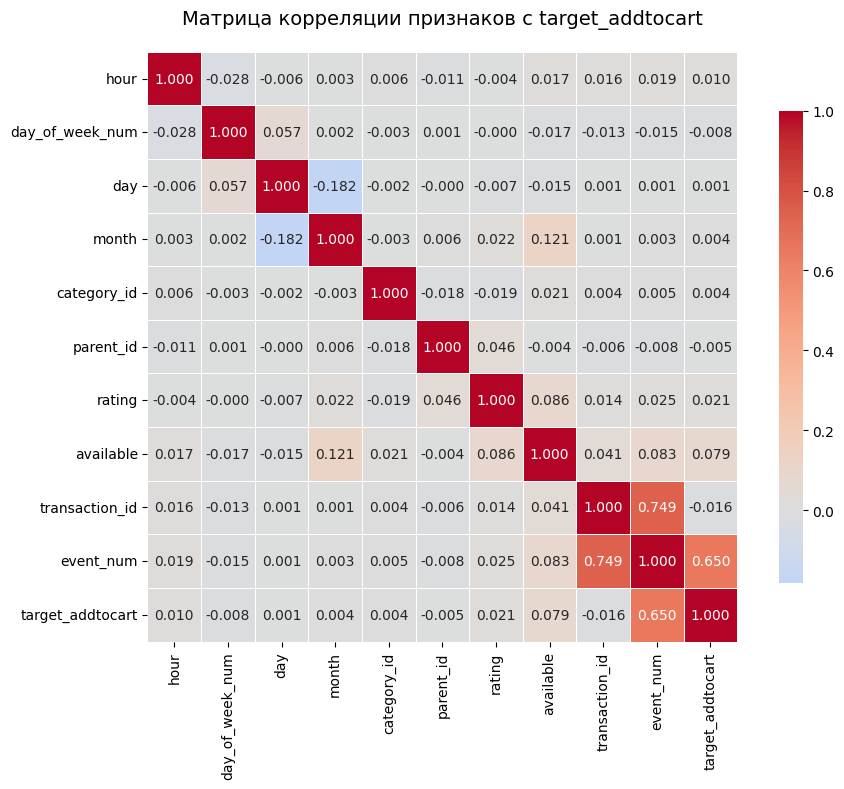

In [41]:
# Преобразуем категориальные фичи в числовые для корреляции
corr_data = final_data.copy()

# 1. Преобразуем day_of_week в числа
day_map = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 
           'Friday': 4, 'Saturday': 5, 'Sunday': 6}
corr_data['day_of_week_num'] = corr_data['day_of_week'].map(day_map)

# 2. Преобразуем event в числа (one-hot будет слишком много, используем label encoding)
event_map = {'view': 0, 'addtocart': 1, 'transaction': 2}
corr_data['event_num'] = corr_data['event'].map(event_map)

# 3. available уже числовой (0/1)
corr_data['available'] = corr_data['available'].astype(int)

# 4. transaction_id уже числовой (0/1)

# Выбираем числовые колонки для корреляции
numeric_columns = [
    'hour', 'day_of_week_num', 'day', 'month', 
    'category_id', 'parent_id', 'rating', 'available',
    'transaction_id', 'event_num',  # преобразованные фичи
    'target_addtocart'              # основной таргет
]

# Удаляем пропуски для корреляции
corr_matrix = corr_data[numeric_columns].dropna().corr()

# Строим тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Матрица корреляции признаков с target_addtocart', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig(f'{ASSETS_DIR}/correlation_matrix_final.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
print(" Корреляция с target_addtocart:")
print("=" * 55)

target_correlations = corr_matrix['target_addtocart'].sort_values(ascending=False)

for feature, corr in target_correlations.items():
    if feature != 'target_addtocart':
        print(f"{feature:20} : {corr:+.4f}")

 Корреляция с target_addtocart:
event_num            : +0.6505
available            : +0.0787
rating               : +0.0206
hour                 : +0.0097
month                : +0.0043
category_id          : +0.0037
day                  : +0.0005
parent_id            : -0.0052
day_of_week_num      : -0.0076
transaction_id       : -0.0158


ЭТАП 4: Сохранение данных

In [43]:
# Проверка данных на пропуски
print(" ПРОВЕРКА ДАННЫХ:")
print("=" * 30)

for col in final_data.columns:
    null_count = final_data[col].isnull().sum()
    if null_count > 0:
        print(f" {col}: {null_count:,} пропусков")
    else:
        print(f" {col}: OK")

print(f"\n Всего строк: {len(final_data):,}")
print(f" Всего колонок: {len(final_data.columns)}")

 ПРОВЕРКА ДАННЫХ:
 timestamp: OK
 visitor_id: OK
 item_id: OK
 event: OK
 transaction_id: OK
 hour: OK
 day_of_week: OK
 day: OK
 month: OK
 category_id: 255,576 пропусков
 parent_id: 255,583 пропусков
 rating: OK
 available: OK
 target_addtocart: OK

 Всего строк: 2,755,641
 Всего колонок: 14


In [44]:
print("🔍 ПРОВЕРКА ЗНАЧЕНИЯ 0 В ПРИЗНАКАХ:")
print("=" * 35)

print(f"category_id = 0: {(final_data['category_id'] == 0).sum():,}")
print(f"parent_id = 0: {(final_data['parent_id'] == 0).sum():,}")

🔍 ПРОВЕРКА ЗНАЧЕНИЯ 0 В ПРИЗНАКАХ:
category_id = 0: 1,119
parent_id = 0: 0


In [45]:
# Проверим совпадение пропусков
print("🔍 ПРОВЕРКА СОВПАДЕНИЯ ПРОПУСКОВ:")
print("=" * 35)

same_nulls = (final_data['category_id'].isnull() == final_data['parent_id'].isnull()).all()
print(f"Пропуски совпадают: {same_nulls}")

if same_nulls:
    null_count = final_data['category_id'].isnull().sum()
    print(f"Всего строк с пропусками: {null_count:,}")
    print(f"Это {null_count/len(final_data)*100:.1f}% данных")

🔍 ПРОВЕРКА СОВПАДЕНИЯ ПРОПУСКОВ:
Пропуски совпадают: False


In [46]:
print("🔍 ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:")
print("=" * 30)

# Разные комбинации пропусков
only_category_null = (final_data['category_id'].isnull() & final_data['parent_id'].notnull()).sum()
only_parent_null = (final_data['category_id'].notnull() & final_data['parent_id'].isnull()).sum()
both_null = (final_data['category_id'].isnull() & final_data['parent_id'].isnull()).sum()

print(f"Только category_id пропущен: {only_category_null:,}")
print(f"Только parent_id пропущен: {only_parent_null:,}") 
print(f"Оба пропущены: {both_null:,}")
print(f"Всего пропусков category_id: {final_data['category_id'].isnull().sum():,}")
print(f"Всего пропусков parent_id: {final_data['parent_id'].isnull().sum():,}")

🔍 ДЕТАЛЬНЫЙ АНАЛИЗ ПРОПУСКОВ:
Только category_id пропущен: 0
Только parent_id пропущен: 7
Оба пропущены: 255,576
Всего пропусков category_id: 255,576
Всего пропусков parent_id: 255,583


In [47]:
# Посмотрим на товары без категорий
no_category_items = final_data[final_data['category_id'].isnull()]['item_id'].nunique()
print(f"📦 Уникальных товаров без категорий: {no_category_items:,}")

# Посмотрим есть ли у них взаимодействия
no_category_events = final_data[final_data['category_id'].isnull()]['event'].value_counts()
print("📊 События товаров без категорий:")
print(no_category_events)

📦 Уникальных товаров без категорий: 49,815
📊 События товаров без категорий:
event
view           254268
addtocart         833
transaction       475
Name: count, dtype: int64


Причины оставить:
1. 49K товаров - значительная часть ассортимента
 2. 833 добавления в корзину - реальный спрос
 3. 475 покупок - товары продаются
 4. Могут быть новинки или товары в процессе категоризации

In [48]:
final_data['category_id'] = final_data['category_id'].fillna(-1).astype(int)
final_data['parent_id'] = final_data['parent_id'].fillna(-1).astype(int)

print(" Данные сохранены, пропуски заполнены -1")

 Данные сохранены, пропуски заполнены -1


In [49]:
# Сохраняем
final_data.to_parquet(f'{PATH_DATA}/final_data.parquet', index=False)

Основные столбцы для коллабротивной фильтрации:  
essential_cols = ['visitor_id', 'item_id', 'event', 'timestamp']  
- visitor_id, item_id - для user-item матрицы  
- event - для весов взаимодействий  
- timestamp - для временного разделения  

Фичи для гибридной модели:  
- additional_features = ['category_id', 'parent_id', 'rating', 'available', 'hour', 'day', 'month']  
  
target_addtocart для оценки рекомендаций. Будем смотреть, рекомендуем ли товары которые добавляют в корзину

Разбиение данных

In [50]:
# Разбиваем данные на тренировочную, тестовую выборки.

# Преобразуем timestamp в datetime
final_data['timestamp'] = pd.to_datetime(final_data['timestamp'])

# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2015-08-01 00:00:00")

# Фильтрация данных на основе условия
train_test_global_time_split_idx = final_data["timestamp"] < train_test_global_time_split_date
events_train = final_data[train_test_global_time_split_idx]
events_test = final_data[~train_test_global_time_split_idx]

print(events_train.shape)
print(events_test.shape)

(1898746, 14)
(856895, 14)


In [51]:
display(events_train['timestamp'].describe())
display(events_test['timestamp'].describe())

count                          1898746
mean     2015-06-18 04:53:41.410846976
min                2015-05-03 03:00:00
25%                2015-05-26 01:37:00
50%                2015-06-18 14:13:00
75%                2015-07-11 12:21:00
max                2015-07-31 23:59:00
Name: timestamp, dtype: object

count                           856895
mean     2015-08-24 23:41:23.592902400
min                2015-08-01 00:00:00
25%                2015-08-12 22:38:00
50%                2015-08-25 02:36:00
75%                2015-09-06 04:35:00
max                2015-09-18 02:59:00
Name: timestamp, dtype: object

In [52]:
# количество пользователей в train и test
print(len(events_train["visitor_id"].drop_duplicates()))
print(len(events_test["visitor_id"].drop_duplicates()))

962528
475320


In [53]:
# количество пользователей в train и test
users_train = events_train["visitor_id"].drop_duplicates()
users_test = events_test["visitor_id"].drop_duplicates()
# Количество пользователей, которые есть и в train, и в test
common_users = set(users_train).intersection(set(users_test))

print(len(users_train), len(users_test), len(common_users))

962528 475320 30268


In [54]:
# Холодные пользователи. Те кто есть в тест, но нет в трейн
cold_users = users_test[~users_test.isin(common_users)]

print(len(cold_users))

445052


In [55]:
# анализ холодного старта
items_in_train = set(events_train.item_id.unique())
items_in_test = set(events_test.item_id.unique())
items_diff = items_in_test.difference(items_in_train)

print(f"Идентификаторов товара в train: {len(items_in_train):,}")
print(f"Идентификаторов товара в test: {len(items_in_test):,}")
print(f"Новых идентификаторов товара в test (cold start): {len(items_diff):,} ({len(items_diff)/len(items_in_test)*100:.1f}%)")

Идентификаторов товара в train: 199,689
Идентификаторов товара в test: 142,759
Новых идентификаторов товара в test (cold start): 35,372 (24.8%)


In [56]:
# Дропаем items в test которых нет в train
original_test_size = len(events_test)
events_test = events_test[events_test['item_id'].isin(items_in_train)]
print(f"Test set после фильтрации: {len(events_test):,} (удалено {original_test_size - len(events_test):,} событий)")

Test set после фильтрации: 781,140 (удалено 75,755 событий)


In [57]:
# проверяем
items_in_test = set(events_test.item_id.unique())
items_diff = items_in_test.difference(items_in_train)
len(items_diff)

0

In [58]:
print(f"Train size: {len(events_train):,} ({len(events_train)/len(events)*100:.1f}%)")
print(f"Test size: {len(events_test):,} ({len(events_test)/len(events)*100:.1f}%)")

Train size: 1,898,746 (68.9%)
Test size: 781,140 (28.3%)


In [59]:
# Сохраняем холодных пользователей
cold_users.to_csv(f'{PATH_DATA}/cold_users.csv', index=False)

In [60]:
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

In [61]:
# Проверим текущее состояние
print("До кодирования:")
print(f"Уникальных пользователей: {final_data['visitor_id'].nunique():,}")
print(f"Min visitor_id: {final_data['visitor_id'].min()}")
print(f"Max visitor_id: {final_data['visitor_id'].max()}")


До кодирования:
Уникальных пользователей: 1,407,580
Min visitor_id: 0
Max visitor_id: 1407579


In [62]:
'''
!!! утечка данных

# Пересоздаем кодировщик
user_encoder = LabelEncoder()

# Обучаем на уникальных пользователях
user_encoder.fit(events_train["visitor_id"].unique())

# Применяем преобразование
final_data["visitor_id_enc"] = user_encoder.transform(final_data["visitor_id"])
events_train["visitor_id_enc"] = user_encoder.transform(events_train["visitor_id"])
events_test["visitor_id_enc"] = user_encoder.transform(events_test["visitor_id"])

print("\n Пользователи закодированы")
print(f"Уникальных пользователей: {len(user_encoder.classes_):,}")
print(f"Min visitor_id_enc: {final_data['visitor_id_enc'].min()}")
print(f"Max visitor_id_enc: {final_data['visitor_id_enc'].max()}")
'''

'\n!!! утечка данных\n\n# Пересоздаем кодировщик\nuser_encoder = LabelEncoder()\n\n# Обучаем на уникальных пользователях\nuser_encoder.fit(events_train["visitor_id"].unique())\n\n# Применяем преобразование\nfinal_data["visitor_id_enc"] = user_encoder.transform(final_data["visitor_id"])\nevents_train["visitor_id_enc"] = user_encoder.transform(events_train["visitor_id"])\nevents_test["visitor_id_enc"] = user_encoder.transform(events_test["visitor_id"])\n\nprint("\n Пользователи закодированы")\nprint(f"Уникальных пользователей: {len(user_encoder.classes_):,}")\nprint(f"Min visitor_id_enc: {final_data[\'visitor_id_enc\'].min()}")\nprint(f"Max visitor_id_enc: {final_data[\'visitor_id_enc\'].max()}")\n'

In [63]:
# 1. Создаем кодировщик ТОЛЬКО на train данных
user_encoder = LabelEncoder()
user_encoder.fit(events_train["visitor_id"])

print(f" Кодировщик пользователей обучен на {len(user_encoder.classes_):,} пользователях из train")

# 2. Создаем копию DataFrame и добавляем колонку
events_train = events_train.copy()
events_train["visitor_id_enc"] = user_encoder.transform(events_train["visitor_id"])

# 3. Фильтруем test данные - только известные пользователи
original_test_size = len(events_test)
events_test = events_test[events_test["visitor_id"].isin(user_encoder.classes_)].copy()

print(f" Test отфильтрован: {original_test_size:,} → {len(events_test):,} событий")
print(f"   Удалено {original_test_size - len(events_test):,} событий неизвестных пользователей")

# 4. Добавляем колонку в test данные
events_test["visitor_id_enc"] = user_encoder.transform(events_test["visitor_id"])

 Кодировщик пользователей обучен на 962,528 пользователях из train
 Test отфильтрован: 781,140 → 93,293 событий
   Удалено 687,847 событий неизвестных пользователей


In [64]:
print("Пример закодированных пользователей:")
print(events_train[['visitor_id', 'visitor_id_enc']].head(10))

Пример закодированных пользователей:
   visitor_id  visitor_id_enc
0      257597          176284
1      992329          678637
2      111016           75961
3      483717          330826
4      951259          650623
5      972639          665248
6      810725          554536
7      794181          543155
8      824915          564213
9      339335          232303


In [65]:
'''
!!! утечка данных

# Создаем кодировщик для товаров
item_encoder = LabelEncoder()

# Обучаем на уникальных товарах из final_data
item_encoder.fit(final_data["item_id"].unique())

# Применяем кодировку ко всем датасетам
final_data["item_id_enc"] = item_encoder.transform(final_data["item_id"])
events_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

print(" Товары закодированы")
print(f"Уникальных товаров: {len(item_encoder.classes_):,}")
print(f"Min item_id_enc: {final_data['item_id_enc'].min()}")
print(f"Max item_id_enc: {final_data['item_id_enc'].max()}")
'''

'\n!!! утечка данных\n\n# Создаем кодировщик для товаров\nitem_encoder = LabelEncoder()\n\n# Обучаем на уникальных товарах из final_data\nitem_encoder.fit(final_data["item_id"].unique())\n\n# Применяем кодировку ко всем датасетам\nfinal_data["item_id_enc"] = item_encoder.transform(final_data["item_id"])\nevents_train["item_id_enc"] = item_encoder.transform(events_train["item_id"])\nevents_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])\n\nprint(" Товары закодированы")\nprint(f"Уникальных товаров: {len(item_encoder.classes_):,}")\nprint(f"Min item_id_enc: {final_data[\'item_id_enc\'].min()}")\nprint(f"Max item_id_enc: {final_data[\'item_id_enc\'].max()}")\n'

In [66]:
print("=== ПРАВИЛЬНОЕ КОДИРОВАНИЕ ТОВАРОВ ===")

# 1. Создаем кодировщик ТОЛЬКО на train данных
item_encoder = LabelEncoder()
item_encoder.fit(events_train["item_id"])

print(f"✅ Кодировщик товаров обучен на {len(item_encoder.classes_):,} товарах из train")

# 2. Кодируем train данные
events_train.loc[:, "item_id_enc"] = item_encoder.transform(events_train["item_id"])

# 3. Фильтруем test данные - только известные товары
original_test_size = len(events_test)
events_test = events_test[events_test["item_id"].isin(item_encoder.classes_)].copy()

print(f"✅ Test отфильтрован: {original_test_size:,} → {len(events_test):,} событий")
print(f"   Удалено {original_test_size - len(events_test):,} событий неизвестных товаров")

# 4. Кодируем test данные
events_test.loc[:, "item_id_enc"] = item_encoder.transform(events_test["item_id"])

print("🎉 Кодирование товаров завершено БЕЗ УТЕЧЕК!")

=== ПРАВИЛЬНОЕ КОДИРОВАНИЕ ТОВАРОВ ===
✅ Кодировщик товаров обучен на 199,689 товарах из train
✅ Test отфильтрован: 93,293 → 93,293 событий
   Удалено 0 событий неизвестных товаров
🎉 Кодирование товаров завершено БЕЗ УТЕЧЕК!


In [67]:
print("Пример закодированных товаров:")
print(events_train[['item_id', 'item_id_enc']].head(10))

Пример закодированных товаров:
   item_id  item_id_enc
0   355908       152461
1   248676       106531
2   318965       136511
3   253185       108484
4   367447       157447
5    22556         9560
6   443030       189615
7   439202       187990
8   428805       183542
9    82389        35446


In [68]:
print("Проверка закодированных данных:")
print(f"Уникальных visitor_id_enc: {events_train['visitor_id_enc'].nunique()}")
print(f"Уникальных item_id_enc: {events_train['item_id_enc'].nunique()}")
print(f"Min visitor_id_enc: {events_train['visitor_id_enc'].min()}")
print(f"Max visitor_id_enc: {events_train['visitor_id_enc'].max()}")
print(f"Min item_id_enc: {events_train['item_id_enc'].min()}")
print(f"Max item_id_enc: {events_train['item_id_enc'].max()}")

Проверка закодированных данных:
Уникальных visitor_id_enc: 962528
Уникальных item_id_enc: 199689
Min visitor_id_enc: 0
Max visitor_id_enc: 962527
Min item_id_enc: 0
Max item_id_enc: 199688


In [69]:
'''
!!! утечка данных

# Создаем кодировщик для категорий
category_encoder = LabelEncoder()

# Обучаем на уникальных категориях из final_data
category_encoder.fit(final_data["category_id"].unique())

# Применяем кодировку ко всем датасетам
final_data["category_id_enc"] = category_encoder.transform(final_data["category_id"])
events_train["category_id_enc"] = category_encoder.transform(events_train["category_id"])
events_test["category_id_enc"] = category_encoder.transform(events_test["category_id"])

print(" Категории закодированы")
print(f"Уникальных категорий: {len(category_encoder.classes_):,}")
print(f"Min category_id_enc: {final_data['category_id_enc'].min()}")
print(f"Max category_id_enc: {final_data['category_id_enc'].max()}")
'''

'\n!!! утечка данных\n\n# Создаем кодировщик для категорий\ncategory_encoder = LabelEncoder()\n\n# Обучаем на уникальных категориях из final_data\ncategory_encoder.fit(final_data["category_id"].unique())\n\n# Применяем кодировку ко всем датасетам\nfinal_data["category_id_enc"] = category_encoder.transform(final_data["category_id"])\nevents_train["category_id_enc"] = category_encoder.transform(events_train["category_id"])\nevents_test["category_id_enc"] = category_encoder.transform(events_test["category_id"])\n\nprint(" Категории закодированы")\nprint(f"Уникальных категорий: {len(category_encoder.classes_):,}")\nprint(f"Min category_id_enc: {final_data[\'category_id_enc\'].min()}")\nprint(f"Max category_id_enc: {final_data[\'category_id_enc\'].max()}")\n'

In [70]:
# 1. Создаем кодировщик ТОЛЬКО на train данных
category_encoder = LabelEncoder()
category_encoder.fit(events_train["category_id"])

print(f"✅ Кодировщик категорий обучен на {len(category_encoder.classes_):,} категориях из train")

# 2. Кодируем train данные
events_train.loc[:, "category_id_enc"] = category_encoder.transform(events_train["category_id"])

# 3. Для test данных используем .apply с обработкой неизвестных категорий
events_test.loc[:, "category_id_enc"] = events_test["category_id"].apply(
    lambda x: category_encoder.transform([x])[0] if x in category_encoder.classes_ else -1
)

print("🎉 Кодирование категорий завершено БЕЗ УТЕЧЕК!")

✅ Кодировщик категорий обучен на 1,062 категориях из train
🎉 Кодирование категорий завершено БЕЗ УТЕЧЕК!


In [71]:
print("Пример закодированных категорий:")
print(events_train[['category_id', 'category_id_enc']].head(10))

Пример закодированных категорий:
   category_id  category_id_enc
0         1173              736
1         1231              775
2           -1                0
3          914              578
4          491              315
5         1074              676
6         1098              695
7         1542              974
8          646              418
9         1404              886


In [72]:
# Проверим кодировку всех специальных значений
print("=== ПРАВИЛЬНАЯ ПРОВЕРКА КОДИРОВКИ КАТЕГОРИЙ ===")
print("=" * 50)

# 1. Проверяем специальные значения на ИСПРАВЛЕННОМ кодировщике
print(" Проверка специальных значений:")
try:
    minus_one_code = category_encoder.transform([-1])[0]
    print(f" category_id = -1 → category_id_enc = {minus_one_code}")
except ValueError:
    print(" category_id = -1 не найден в кодировщике")

# 2. Проверяем на ИСПРАВЛЕННЫХ ДАННЫХ (только train)
print(f"\n ТОП-5 самых частых category_id_enc в TRAIN:")
category_enc_counts = events_train['category_id_enc'].value_counts().head()

for code, count in category_enc_counts.items():
    try:
        original_id = category_encoder.inverse_transform([code])[0]
        print(f"   code {code:4d} (original {original_id:4d}): {count:>8,} строк")
    except:
        print(f"   code {code:4d}: {count:>8,} строк (неизвестная категория)")

# 3. Проверяем код 0 на ИСПРАВЛЕННЫХ ДАННЫХ
print(f"\n ДЕТАЛЬНЫЙ АНАЛИЗ КОДА 0 в TRAIN:")
zero_mask = events_train['category_id_enc'] == 0

if zero_mask.any():
    try:
        zero_original = category_encoder.inverse_transform([0])[0]
        zero_count = zero_mask.sum()
        print(f" category_id_enc = 0 соответствует category_id = {zero_original}")
        print(f"   Количество строк: {zero_count:,}")
        
        # События для этого кода
        zero_events = events_train[zero_mask]['event'].value_counts()
        print("   События для этого кода:")
        for event, count in zero_events.items():
            print(f"     - {event}: {count:,}")
    except:
        print(" Не удалось определить оригинальную категорию для кода 0")
else:
    print("ℹ  Код 0 не используется в train данных")

# 4. Проверяем coverage в test данных
print(f"\n ПОКРЫТИЕ КАТЕГОРИЙ В TEST:")
unknown_categories_test = (~events_test['category_id'].isin(category_encoder.classes_)).sum()
total_test_categories = len(events_test)

print(f"   Неизвестных категорий в test: {unknown_categories_test:,}")
print(f"   Всего событий в test: {total_test_categories:,}")
print(f"   Доля неизвестных категорий: {unknown_categories_test/total_test_categories*100:.1f}%")

=== ПРАВИЛЬНАЯ ПРОВЕРКА КОДИРОВКИ КАТЕГОРИЙ ===
 Проверка специальных значений:
 category_id = -1 → category_id_enc = 0

 ТОП-5 самых частых category_id_enc в TRAIN:
   code    0 (original   -1):  171,173 строк
   code  663 (original 1051):   49,006 строк
   code  315 (original  491):   47,523 строк
   code  941 (original 1483):   42,552 строк
   code  603 (original  959):   34,088 строк

 ДЕТАЛЬНЫЙ АНАЛИЗ КОДА 0 в TRAIN:
 category_id_enc = 0 соответствует category_id = -1
   Количество строк: 171,173
   События для этого кода:
     - view: 170,361
     - addtocart: 512
     - transaction: 300

 ПОКРЫТИЕ КАТЕГОРИЙ В TEST:
   Неизвестных категорий в test: 0
   Всего событий в test: 93,293
   Доля неизвестных категорий: 0.0%


In [73]:
# Создаем кодировщик для родительских категорий
parent_encoder = LabelEncoder()

# Обучаем на уникальных родительских категориях из final_data
parent_encoder.fit(final_data["parent_id"].unique())

# Применяем кодировку ко всем датасетам
final_data["parent_id_enc"] = parent_encoder.transform(final_data["parent_id"])
events_train["parent_id_enc"] = parent_encoder.transform(events_train["parent_id"])
events_test["parent_id_enc"] = parent_encoder.transform(events_test["parent_id"])

print(" Родительские категории закодированы")
print(f"Уникальных родительских категорий: {len(parent_encoder.classes_):,}")
print(f"Min parent_id_enc: {final_data['parent_id_enc'].min()}")
print(f"Max parent_id_enc: {final_data['parent_id_enc'].max()}")

 Родительские категории закодированы
Уникальных родительских категорий: 275
Min parent_id_enc: 0
Max parent_id_enc: 274


In [74]:
# 1. Создаем кодировщик ТОЛЬКО на train данных
parent_encoder = LabelEncoder()
parent_encoder.fit(events_train["parent_id"])

print(f"✅ Кодировщик родительских категорий обучен на {len(parent_encoder.classes_):,} категориях из train")

# 2. Кодируем train данные
events_train.loc[:, "parent_id_enc"] = parent_encoder.transform(events_train["parent_id"])

# 3. Для test данных используем .apply с обработкой неизвестных категорий
events_test.loc[:, "parent_id_enc"] = events_test["parent_id"].apply(
    lambda x: parent_encoder.transform([x])[0] if x in parent_encoder.classes_ else -1
)

print("🎉 Кодирование родительских категорий завершено БЕЗ УТЕЧЕК!")

✅ Кодировщик родительских категорий обучен на 272 категориях из train
🎉 Кодирование родительских категорий завершено БЕЗ УТЕЧЕК!


In [75]:
print("Пример закодированных родительских категорий:")
print(events_train[['parent_id', 'parent_id_enc']])

Пример закодированных родительских категорий:
         parent_id  parent_id_enc
0              805            127
1              901            144
2               -1              0
3              226             43
4              679            107
...            ...            ...
2755166        709            108
2755167       1637            260
2755168        679            107
2755169       1249            195
2755170        500             83

[1898746 rows x 2 columns]


In [76]:
print("=== СОХРАНЕНИЕ ВСЕХ ЧИСТЫХ ДАННЫХ ===")
import joblib

# 1. Сохраняем исправленные данные
events_train_final = events_train
events_test_final = events_test

events_train_final.to_parquet(f'{PATH_DATA}/events_train_clean.parquet', index=False)
events_test_final.to_parquet(f'{PATH_DATA}/events_test_clean.parquet', index=False)

# 2. Сохраняем ВСЕ кодировщики
joblib.dump(user_encoder, f'{PATH_DATA}/user_encoder.pkl')
joblib.dump(item_encoder, f'{PATH_DATA}/item_encoder.pkl') 
joblib.dump(category_encoder, f'{PATH_DATA}/category_encoder.pkl')
joblib.dump(parent_encoder, f'{PATH_DATA}/parent_encoder.pkl')

print("🎉 ВСЕ ДАННЫЕ И КОДИРОВЩИКИ СОХРАНЕНЫ!")
print(f"💾 Train: {len(events_train_final):,} событий")
print(f"💾 Test:  {len(events_test_final):,} событий")


=== СОХРАНЕНИЕ ВСЕХ ЧИСТЫХ ДАННЫХ ===
🎉 ВСЕ ДАННЫЕ И КОДИРОВЩИКИ СОХРАНЕНЫ!
💾 Train: 1,898,746 событий
💾 Test:  93,293 событий


In [77]:

# 3. Финальная статистика
print(f"\n=== ФИНАЛЬНАЯ СТАТИСТИКА ЧИСТЫХ ДАННЫХ ===")
print(f"👥 Пользователей: {events_train_final['visitor_id_enc'].nunique():,} train, {events_test_final['visitor_id_enc'].nunique():,} test")
print(f"🛍️ Товаров: {events_train_final['item_id_enc'].nunique():,} train, {events_test_final['item_id_enc'].nunique():,} test")
print(f"📂 Категорий: {events_train_final['category_id_enc'].nunique():,} train, {events_test_final['category_id_enc'].nunique():,} test")
print(f"🏷️ Родительских категорий: {events_train_final['parent_id_enc'].nunique():,} train, {events_test_final['parent_id_enc'].nunique():,} test")

# 4. Проверка чистоты данных
print(f"\n=== ПРОВЕРКА ОТСУТСТВИЯ УТЕЧЕК ===")
all_users_clean = events_test_final['visitor_id_enc'].isin(events_train_final['visitor_id_enc']).all()
all_items_clean = events_test_final['item_id_enc'].isin(events_train_final['item_id_enc']).all()
all_categories_clean = events_test_final['category_id_enc'].isin(events_train_final['category_id_enc']).all()
all_parents_clean = events_test_final['parent_id_enc'].isin(events_train_final['parent_id_enc']).all()

print(f"✅ Все пользователи test есть в train: {all_users_clean}")
print(f"✅ Все товары test есть в train: {all_items_clean}")
print(f"✅ Все категории test есть в train: {all_categories_clean}")
print(f"✅ Все родительские категории test есть в train: {all_parents_clean}")

print(f"\n🎉 ВСЕ DATA LEAKAGE ИСПРАВЛЕНЫ! МОЖНО ПЕРЕОБУЧАТЬ МОДЕЛИ!")


=== ФИНАЛЬНАЯ СТАТИСТИКА ЧИСТЫХ ДАННЫХ ===
👥 Пользователей: 962,528 train, 28,398 test
🛍️ Товаров: 199,689 train, 33,909 test
📂 Категорий: 1,062 train, 896 test
🏷️ Родительских категорий: 272 train, 248 test

=== ПРОВЕРКА ОТСУТСТВИЯ УТЕЧЕК ===
✅ Все пользователи test есть в train: True
✅ Все товары test есть в train: True
✅ Все категории test есть в train: True
✅ Все родительские категории test есть в train: True

🎉 ВСЕ DATA LEAKAGE ИСПРАВЛЕНЫ! МОЖНО ПЕРЕОБУЧАТЬ МОДЕЛИ!


In [78]:
print("=== СОХРАНЕНИЕ ЧИСТЫХ ДАННЫХ ===")

# Используем твой существующий код
final_columns = ['timestamp',
                 'visitor_id_enc', 'item_id_enc', 'event', 'transaction_id', 
                 'hour', 'day_of_week', 'day', 'month', 'category_id_enc', 'parent_id_enc', 
                 'rating', 'available', 'target_addtocart'
                 ]

events_train_final = events_train[final_columns].copy()
events_test_final = events_test[final_columns].copy()

events_train_final.to_parquet(f'{PATH_DATA}/events_train_clean.parquet', index=False)
events_test_final.to_parquet(f'{PATH_DATA}/events_test_clean.parquet', index=False)


=== СОХРАНЕНИЕ ЧИСТЫХ ДАННЫХ ===


In [79]:
import joblib

# Сохраняем ВСЕ кодировщики
joblib.dump(user_encoder, f'{PATH_DATA}/user_encoder.pkl')
joblib.dump(item_encoder, f'{PATH_DATA}/item_encoder.pkl') 
joblib.dump(category_encoder, f'{PATH_DATA}/category_encoder.pkl')
joblib.dump(parent_encoder, f'{PATH_DATA}/parent_encoder.pkl')

print(" Кодировщики сохранены")

 Кодировщики сохранены


In [80]:

print(" ВСЕ ДАННЫЕ И КОДИРОВЩИКИ СОХРАНЕНЫ!")
print(f" Train: {len(events_train_final):,} событий")
print(f" Test:  {len(events_test_final):,} событий")

# Финальная статистика
print(f"\n=== ФИНАЛЬНАЯ СТАТИСТИКА ЧИСТЫХ ДАННЫХ ===")
print(f" Пользователей: {events_train_final['visitor_id_enc'].nunique():,} train, {events_test_final['visitor_id_enc'].nunique():,} test")
print(f" Товаров: {events_train_final['item_id_enc'].nunique():,} train, {events_test_final['item_id_enc'].nunique():,} test")
print(f" Категорий: {events_train_final['category_id_enc'].nunique():,} train, {events_test_final['category_id_enc'].nunique():,} test")
print(f" Родительских категорий: {events_train_final['parent_id_enc'].nunique():,} train, {events_test_final['parent_id_enc'].nunique():,} test")

 ВСЕ ДАННЫЕ И КОДИРОВЩИКИ СОХРАНЕНЫ!
 Train: 1,898,746 событий
 Test:  93,293 событий

=== ФИНАЛЬНАЯ СТАТИСТИКА ЧИСТЫХ ДАННЫХ ===
 Пользователей: 962,528 train, 28,398 test
 Товаров: 199,689 train, 33,909 test
 Категорий: 1,062 train, 896 test
 Родительских категорий: 272 train, 248 test


In [81]:
events_train_final

,timestamp,visitor_id_enc,item_id_enc,event,transaction_id,hour,day_of_week,day,month,category_id_enc,parent_id_enc,rating,available,target_addtocart
0,2015-06-02 05:02:00,176284,152461,view,0,5,Tuesday,2,6,736,127,0.016417,1,0
1,2015-06-02 05:50:00,678637,106531,view,0,5,Tuesday,2,6,775,144,0.009675,1,0
2,2015-06-02 05:13:00,75961,136511,view,0,5,Tuesday,2,6,0,0,0.004104,0,0
3,2015-06-02 05:12:00,330826,108484,view,0,5,Tuesday,2,6,578,43,0.003811,0,0
4,2015-06-02 05:02:00,650623,157447,view,0,5,Tuesday,2,6,315,107,0.075931,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755166,2015-07-31 16:27:00,391766,45017,view,0,16,Friday,31,7,377,108,0.025799,1,0
2755167,2015-07-31 16:11:00,714414,111113,view,0,16,Friday,31,7,5,260,0.023454,1,0
2755168,2015-07-31 16:15:00,294509,101960,view,0,16,Friday,31,7,315,107,0.042803,1,0
2755169,2015-07-31 16:24:00,178059,119158,view,0,16,Friday,31,7,878,195,0.009088,1,0


# Очистка памяти
Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже.

In [82]:
import os
import joblib

import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import scipy
import mlflow
from implicit.als import AlternatingLeastSquares
import psycopg2 as psycopg

import pickle

#from catboost import CatBoostClassifier, Pool
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

from dotenv import load_dotenv
import boto3

import warnings
warnings.filterwarnings("ignore")

Директория

In [83]:
RANDOM_STATE = 42
# Пути и названия файлов заданы в виде параметров
PATH_DATA = 'data'

PATH_MODELS = 'models'
MODEL_FILE = 'model.pkl'

ASSETS_DIR = 'mlflow_server/eda_plots'

#TRACKING_SERVER_HOST = "127.0.0.1"
#TRACKING_SERVER_PORT = 5000

#EXPERIMENT_NAME = 'project_final_ml'
#REGISTRY_MODEL_NAME = "ranking_model"

# Рекомендации  

# Топ товаров

In [84]:
# загружаем
events_train_clean = pd.read_parquet(f'{PATH_DATA}/events_train_clean.parquet')

# Считаем популярность товаров
item_popularity = events_train_clean \
    .groupby("item_id_enc").agg(
        users=("visitor_id_enc", "nunique"), 
        avg_rating=("rating", "mean")
    ).reset_index()

# Топ-50 товаров
top_items = item_popularity.sort_values('users', ascending=False).head(500)
top_items['rank'] = range(1, len(top_items) + 1)

# Создаем папку если не существует
os.makedirs(f'{PATH_DATA}/recommendations', exist_ok=True)

# Сохраняем
top_items.to_parquet(f'{PATH_DATA}/recommendations/top_popular.parquet', engine='pyarrow')

Топ-15 самых популярных товаров:
        item_id_enc  users  avg_rating  rank
2304           2304   1686    0.683964     1
158755       158755   1236    0.543242     2
127571       127571   1083    0.481091     3
132585       132585   1033    0.476986     4
143788       143788    999    0.418352     5
41684         41684    909    0.478452     6
151752       151752    812    0.295221     7
110139       110139    792    0.482556     8
197512       197512    741    0.871885     9
65102         65102    722    0.360305    10
39432         39432    685    0.299912    11
189028       189028    672    0.419818    12
47934         47934    670    0.423923    13
57537         57537    669    0.265611    14
100301       100301    662    0.382879    15


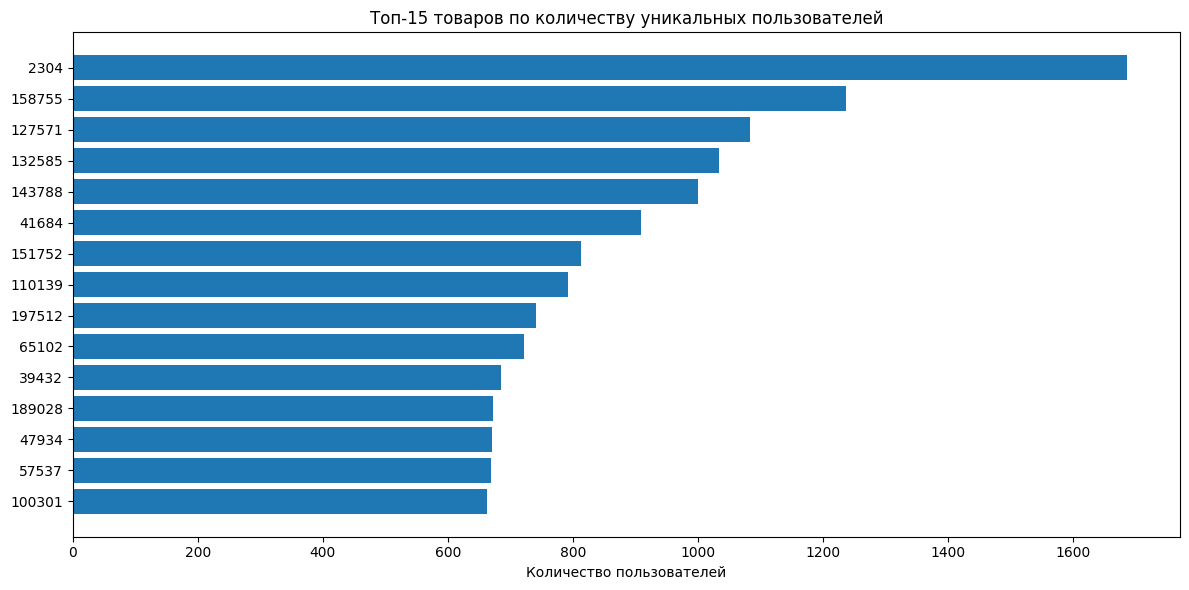

Самый популярный товар: 2304.0
Количество пользователей: 1686.0


In [85]:
# Посмотрим на топ-15 самых популярных товаров
top_15 = top_items.head(15)
print("Топ-15 самых популярных товаров:")
print(top_15[['item_id_enc', 'users', 'avg_rating', 'rank']])

# Визуализируем
plt.figure(figsize=(12, 6))
plt.barh([str(x) for x in top_15['item_id_enc']], top_15['users'])
plt.title('Топ-15 товаров по количеству уникальных пользователей')
plt.xlabel('Количество пользователей')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Самый популярный товар: {top_15.iloc[0]['item_id_enc']}")
print(f"Количество пользователей: {top_15.iloc[0]['users']}")

In [86]:
import pandas as pd
import mlflow
import joblib

# Загружаем данные
cold_users = pd.read_csv(f'{PATH_DATA}/cold_users.csv')
top_items = pd.read_parquet(f'{PATH_DATA}/recommendations/top_popular.parquet')
events_test_clean = pd.read_parquet(f'{PATH_DATA}/events_test_clean.parquet')

# Загружаем кодировщик
user_encoder = joblib.load(f'{PATH_DATA}/user_encoder.pkl')

print("=== АНАЛИЗ РЕКОМЕНДАЦИЙ ДЛЯ ХОЛОДНЫХ ПОЛЬЗОВАТЕЛЕЙ ===")
print(f"Всего холодных пользователей: {len(cold_users):,}")
print(f"Топ рекомендаций: {len(top_items)} товаров")

# ФИЛЬТРУЕМ cold_users - оставляем только тех, кто есть в кодировщике
known_cold_users = cold_users[cold_users['visitor_id'].isin(user_encoder.classes_)].copy()

print(f"Холодных пользователей, известных модели: {len(known_cold_users):,}")
print(f"Неизвестных холодных пользователей: {len(cold_users) - len(known_cold_users):,}")

# Если есть известные холодные пользователи - анализируем их
if len(known_cold_users) > 0:
    # Кодируем ТОЛЬКО известных холодных пользователей
    known_cold_users['visitor_id_enc'] = user_encoder.transform(known_cold_users['visitor_id'])

    # Анализируем события известных холодных пользователей в тестовой выборке
    cold_users_events = events_test_clean[events_test_clean['visitor_id_enc'].isin(known_cold_users['visitor_id_enc'])]

    print(f"Событий известных холодных пользователей: {len(cold_users_events):,}")
    print(f"Уникальных товаров у холодных пользователей: {cold_users_events['item_id_enc'].nunique():,}")

    if len(cold_users_events) > 0:
        # Проверяем совпадения с топ рекомендациями
        cold_events_with_recs = cold_users_events.merge(
            top_items[['item_id_enc', 'rank']], 
            on='item_id_enc', 
            how='left'
        )

        # 1. Анализ покрытия пользователей
        users_with_matches = cold_events_with_recs[
            cold_events_with_recs['rank'].notna()
        ]['visitor_id_enc'].nunique()

        print(f"\n=== ПОКРЫТИЕ ПОЛЬЗОВАТЕЛЕЙ ===")
        print(f"Пользователей с совпадениями: {users_with_matches:,}")
        print(f"Доля пользователей с совпадениями: {users_with_matches/len(known_cold_users)*100:.1f}%")

        # 2. Анализ покрытия событий
        events_with_matches = cold_events_with_recs['rank'].notna().sum()
        print(f"\n=== ПОКРЫТИЕ СОБЫТИЙ ===")
        print(f"Событий с совпадениями: {events_with_matches:,}")
        print(f"Доля событий с совпадениями: {events_with_matches/len(cold_users_events)*100:.1f}%")

        # 3. Детальный анализ покрытия по пользователям
        user_coverage = cold_events_with_recs.groupby('visitor_id_enc').agg(
            total_events=('item_id_enc', 'count'),
            matched_events=('rank', lambda x: x.notna().sum())
        ).reset_index()

        user_coverage['coverage_ratio'] = user_coverage['matched_events'] / user_coverage['total_events']

        print(f"\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ПОКРЫТИЯ ===")
        print(f"Пользователей без совпадений: {(user_coverage['matched_events'] == 0).sum():,}")
        print(f"Доля пользователей без совпадений: {(user_coverage['matched_events'] == 0).mean()*100:.1f}%")
        
        if len(user_coverage[user_coverage['matched_events'] > 0]) > 0:
            print(f"Среднее покрытие (у кого есть совпадения): {user_coverage[user_coverage['matched_events'] > 0]['coverage_ratio'].mean()*100:.1f}%")
        else:
            print(f"Среднее покрытие (у кого есть совпадения): 0%")
        
        print(f"Общее среднее покрытие: {user_coverage['coverage_ratio'].mean()*100:.1f}%")

        # 4. Анализ по типам событий
        print(f"\n=== АНАЛИЗ ПО ТИПАМ СОБЫТИЙ ===")
        event_types_analysis = cold_events_with_recs.groupby('event').agg(
            total=('visitor_id_enc', 'count'),
            matched=('rank', lambda x: x.notna().sum())
        ).reset_index()
        event_types_analysis['match_rate'] = event_types_analysis['matched'] / event_types_analysis['total'] * 100
        print(event_types_analysis)
    else:
        print(" Нет событий для анализа")
else:
    print(" ВЫВОД: Cold start проблема подтверждена!")
    print("   - 0 холодных пользователей известны модели")
    print("   - Для них нужны отдельные подходы:")
    print("     • Топ-популярные товары")
    print("     • Демографические рекомендации") 
    print("     • Content-based подходы")

=== АНАЛИЗ РЕКОМЕНДАЦИЙ ДЛЯ ХОЛОДНЫХ ПОЛЬЗОВАТЕЛЕЙ ===
Всего холодных пользователей: 445,052
Топ рекомендаций: 500 товаров
Холодных пользователей, известных модели: 0
Неизвестных холодных пользователей: 445,052
 ВЫВОД: Cold start проблема подтверждена!
   - 0 холодных пользователей известны модели
   - Для них нужны отдельные подходы:
     • Топ-популярные товары
     • Демографические рекомендации
     • Content-based подходы


# Персональные  

Рассчитаем персональные рекомендации.

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже.

In [87]:
import scipy.sparse
import numpy as np
from implicit.als import AlternatingLeastSquares
import pandas as pd
import joblib


In [88]:
RANDOM_STATE = 42
# Пути и названия файлов заданы в виде параметров
PATH_DATA = 'data'

PATH_MODELS = 'models'
MODEL_FILE = 'model.pkl'

ASSETS_DIR = 'mlflow_server/eda_plots'

#TRACKING_SERVER_HOST = "127.0.0.1"
#TRACKING_SERVER_PORT = 5000

#EXPERIMENT_NAME = 'project_final_ml'
#REGISTRY_MODEL_NAME = "ranking_model"

In [89]:
# Загружаем очищенные данные
print("=== ЗАГРУЗКА ДАННЫХ ===")
events_train_clean = pd.read_parquet(f'{PATH_DATA}/events_train_clean.parquet')
events_test_clean = pd.read_parquet(f'{PATH_DATA}/events_test_clean.parquet')

print(f"Train: {len(events_train_clean):,} событий")
print(f"Test:  {len(events_test_clean):,} событий")
print(f"Колонки: {list(events_train_clean.columns)}")

=== ЗАГРУЗКА ДАННЫХ ===
Train: 1,898,746 событий
Test:  93,293 событий
Колонки: ['timestamp', 'visitor_id_enc', 'item_id_enc', 'event', 'transaction_id', 'hour', 'day_of_week', 'day', 'month', 'category_id_enc', 'parent_id_enc', 'rating', 'available', 'target_addtocart']


In [90]:
print("\n=== ШАГ 1: ОБРАБОТКА ВЕСОВ ===")

# Веса с фокусом на addtocart (основной таргет)
EVENT_WEIGHTS = {
    'view': 1.0,
    'addtocart': 10.0,    # основной таргет
    'transaction': 5.0    # вторичный таргет
}

print("Веса событий:")
for event, weight in EVENT_WEIGHTS.items():
    count = (events_train_clean['event'] == event).sum()
    print(f"  {event:12}: вес = {weight:2.0f}, событий = {count:>8,}")

# Добавляем веса в данные
events_train_clean['weight'] = events_train_clean['event'].map(EVENT_WEIGHTS)

# Проверяем распределение весов (как в музыкальном проекте)
print(f"\n=== Анализ весов ===")
print(f"Всего записей: {len(events_train_clean):,}")
print(f"Min вес: {events_train_clean['weight'].min()}")
print(f"Max вес: {events_train_clean['weight'].max()}")
print(f"Mean вес: {events_train_clean['weight'].mean():.6f}")
print(f"Median вес: {events_train_clean['weight'].median():.6f}")

# Проверка распределения
print("\nРаспределение весов:")
print(events_train_clean['weight'].describe())

# Проверка нулей и NaN (как в музыке)
print(f"\nНулевых значений: {(events_train_clean['weight'] == 0).sum():,}")
print(f"NaN значений: {events_train_clean['weight'].isna().sum():,}")

# Обработка нулевых весов (если есть) - как в музыкальном проекте
if events_train_clean['weight'].min() == 0:
    min_positive = events_train_clean[events_train_clean['weight'] > 0]['weight'].min()
    zero_mask = events_train_clean['weight'] == 0
    events_train_clean.loc[zero_mask, 'weight'] = min_positive * 0.1
    print(f"Заменено {zero_mask.sum():,} нулевых значений")
    
    print("=== Исправленное распределение ===")
    print(events_train_clean['weight'].describe())
    print(f"Нулевых значений: {(events_train_clean['weight'] == 0).sum()}")
else:
    print(" Нулевых весов нет")


=== ШАГ 1: ОБРАБОТКА ВЕСОВ ===
Веса событий:
  view        : вес =  1, событий = 1,836,691
  addtocart   : вес = 10, событий =   46,599
  transaction : вес =  5, событий =   15,456

=== Анализ весов ===
Всего записей: 1,898,746
Min вес: 1.0
Max вес: 10.0
Mean вес: 1.253438
Median вес: 1.000000

Распределение весов:
count    1.898746e+06
mean     1.253438e+00
std      1.433148e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+01
Name: weight, dtype: float64

Нулевых значений: 0
NaN значений: 0
 Нулевых весов нет


In [91]:
print("\n=== ШАГ 2: СОЗДАНИЕ USER-ITEM МАТРИЦЫ ===")

import scipy.sparse

# Создаем матрицу
user_item_matrix = scipy.sparse.csr_matrix((
    events_train_clean['weight'].values,
    (events_train_clean['visitor_id_enc'].values, events_train_clean['item_id_enc'].values)),
    shape=(events_train_clean['visitor_id_enc'].max() + 1, events_train_clean['item_id_enc'].max() + 1),
    dtype=np.float32
)

print(f"Размерность матрицы: {user_item_matrix.shape}")
print(f"Ненулевых элементов: {user_item_matrix.nnz:,}")
print(f"Минимальное значение: {user_item_matrix.data.min():.6f}")
print(f"Максимальное значение: {user_item_matrix.data.max():.6f}")
print(f"Среднее значение: {user_item_matrix.data.mean():.6f}")
print(f"Заполненность матрицы: {user_item_matrix.nnz / (user_item_matrix.shape[0] * user_item_matrix.shape[1]) * 100:.6f}%")

# Анализ матрицы 
print(f"\n=== АНАЛИЗ МАТРИЦЫ ===")
matrix_data = user_item_matrix.data
print(f"Минимальный вес в матрице: {matrix_data.min()}")
print(f"Максимальный вес в матрице: {matrix_data.max()}")
print(f"Средний вес в матрице: {matrix_data.mean():.2f}")

# Анализ по пользователям
user_interactions = np.array(user_item_matrix.sum(axis=1)).flatten()
print(f"\nСтатистика по пользователям:")
print(f"  Среднее взаимодействий на пользователя: {user_interactions.mean():.2f}")
print(f"  Медиана взаимодействий: {np.median(user_interactions):.2f}")
print(f"  Максимум взаимодействий: {user_interactions.max():.2f}")

# Анализ по товарам
item_interactions = np.array(user_item_matrix.sum(axis=0)).flatten()
print(f"\nСтатистика по товарам:")
print(f"  Среднее взаимодействий на товар: {item_interactions.mean():.2f}")
print(f"  Медиана взаимодействий: {np.median(item_interactions):.2f}")
print(f"  Максимум взаимодействий: {item_interactions.max():.2f}")


=== ШАГ 2: СОЗДАНИЕ USER-ITEM МАТРИЦЫ ===
Размерность матрицы: (962528, 199689)
Ненулевых элементов: 1,472,639
Минимальное значение: 1.000000
Максимальное значение: 311.000000
Среднее значение: 1.616120
Заполненность матрицы: 0.000766%

=== АНАЛИЗ МАТРИЦЫ ===
Минимальный вес в матрице: 1.0
Максимальный вес в матрице: 311.0
Средний вес в матрице: 1.62

Статистика по пользователям:
  Среднее взаимодействий на пользователя: 2.47
  Медиана взаимодействий: 1.00
  Максимум взаимодействий: 10752.00

Статистика по товарам:
  Среднее взаимодействий на товар: 11.92
  Медиана взаимодействий: 3.00
  Максимум взаимодействий: 3186.00


In [92]:
print("\n=== АНАЛИЗ ВЫБРОСОВ В МАТРИЦЕ ===")

# Найдем пользователя с максимальным весом
max_weight = user_item_matrix.max()
max_weight_pos = user_item_matrix.argmax()

# Преобразуем линейный индекс в координаты
user_idx = max_weight_pos // user_item_matrix.shape[1]
item_idx = max_weight_pos % user_item_matrix.shape[1]

print(f"Максимальный вес {max_weight} у:")
print(f"  - пользователя visitor_id_enc: {user_idx}")
print(f"  - товара item_id_enc: {item_idx}")

# Посмотрим на историю этого пользователя
super_user_events = events_train_clean[events_train_clean['visitor_id_enc'] == user_idx]
print(f"Всего событий у этого пользователя: {len(super_user_events)}")

# Посмотрим на взаимодействия с этим товаром
super_item_events = super_user_events[super_user_events['item_id_enc'] == item_idx]
print(f"Событий с этим товаром: {len(super_item_events)}")
print("Типы событий:")
print(super_item_events['event'].value_counts())


=== АНАЛИЗ ВЫБРОСОВ В МАТРИЦЕ ===
Максимальный вес 311.0 у:
  - пользователя visitor_id_enc: 285059
  - товара item_id_enc: 12441
Всего событий у этого пользователя: 584
Событий с этим товаром: 68
Типы событий:
event
view         41
addtocart    27
Name: count, dtype: int64


In [93]:
print("\n=== ДЕТАЛЬНЫЙ АНАЛИЗ СУПЕР-ТОВАРА ===")

# Посмотрим на товар 12441 у других пользователей
item_12441_events = events_train_clean[events_train_clean['item_id_enc'] == 12441]
print(f"Всего взаимодействий с товаром 12441: {len(item_12441_events)}")
print(f"Уникальных пользователей: {item_12441_events['visitor_id_enc'].nunique()}")
print("Распределение событий по всем пользователям:")
print(item_12441_events['event'].value_counts())

# Проверим, не является ли это популярным товаром
if len(item_12441_events) > 100:
    print("  Это популярный товар - объясняет множественные взаимодействия")
else:
    print(" Нетипичный случай - пользователь особо заинтересован")


=== ДЕТАЛЬНЫЙ АНАЛИЗ СУПЕР-ТОВАРА ===
Всего взаимодействий с товаром 12441: 833
Уникальных пользователей: 492
Распределение событий по всем пользователям:
event
view           704
addtocart      115
transaction     14
Name: count, dtype: int64
  Это популярный товар - объясняет множественные взаимодействия


In [94]:
# Sparse матрица состоит из ТРЕХ массивов:
total_memory = (
    user_item_matrix.data.nbytes +     # данные весов (float32)
    user_item_matrix.indices.nbytes +  # индексы столбцов (int32) 
    user_item_matrix.indptr.nbytes     # указатели строк (int32)
) / 1024**3

print(f"Размер ВСЕЙ sparse матрицы: {total_memory:.3f} GB")

Размер ВСЕЙ sparse матрицы: 0.015 GB


In [95]:
print("\n=== ШАГ 3: ОБУЧЕНИЕ ALS МОДЕЛИ ===")

from implicit.als import AlternatingLeastSquares
from threadpoolctl import threadpool_limits

# Используем те же параметры, что и в музыкальном проекте
als_model = AlternatingLeastSquares(
    factors=64,
    iterations=50, 
    regularization=0.05,
    alpha=40,
    random_state=RANDOM_STATE
)

print("Обучаем ALS модель...")
# Ограничиваем потоки как в музыкальном проекте
with threadpool_limits(limits=1, user_api='blas'):
    als_model.fit(user_item_matrix)
print(" Модель обучена!")


=== ШАГ 3: ОБУЧЕНИЕ ALS МОДЕЛИ ===
Обучаем ALS модель...


  0%|          | 0/50 [00:00<?, ?it/s]

 Модель обучена!


In [96]:
print("\n=== ШАГ 4: СОХРАНЕНИЕ МОДЕЛИ ===")

# Создаем директорию для моделей
os.makedirs(PATH_MODELS, exist_ok=True)

# Сохраняем модель
als_model.save(f"{PATH_MODELS}/als_model")
print(f" Модель сохранена: {PATH_MODELS}/als_model")

# Проверяем размер модели
model_size_mb = os.path.getsize(f"{PATH_MODELS}/als_model.npz") / 1024**2
print(f"Размер файла модели: {model_size_mb:.1f} MB")


=== ШАГ 4: СОХРАНЕНИЕ МОДЕЛИ ===
 Модель сохранена: models/als_model
Размер файла модели: 283.7 MB


In [97]:
print("\n=== ШАГ 5: ПРОВЕРКА МОДЕЛИ НА ПРИМЕРЕ ===")

# Выбираем случайного пользователя
sample_user_id = events_train_clean['visitor_id_enc'].sample().iat[0]
print(f"Тестируем на пользователе: visitor_id_enc = {sample_user_id}")

# Получаем рекомендации
with threadpool_limits(limits=1, user_api='blas'):
    recommendations = als_model.recommend(
        sample_user_id, 
        user_item_matrix[sample_user_id], 
        filter_already_liked_items=True,
        N=5
    )

print("Топ-5 рекомендаций:")
for i, (item_id, score) in enumerate(zip(recommendations[0], recommendations[1])):
    print(f"  {i+1}. item_id_enc: {item_id}, score: {score:.6f}")


=== ШАГ 5: ПРОВЕРКА МОДЕЛИ НА ПРИМЕРЕ ===
Тестируем на пользователе: visitor_id_enc = 900807
Топ-5 рекомендаций:
  1. item_id_enc: 69398, score: 0.635420
  2. item_id_enc: 94041, score: 0.578895
  3. item_id_enc: 168331, score: 0.559957
  4. item_id_enc: 164631, score: 0.556844
  5. item_id_enc: 117639, score: 0.516430


In [98]:
print("\n=== ШАГ 6: ГЕНЕРАЦИЯ РЕКОМЕНДАЦИЙ ДЛЯ ТЕСТОВЫХ ПОЛЬЗОВАТЕЛЕЙ ===")

# Получаем ID только ТЕСТОВЫХ пользователей
test_user_ids_encoded = events_test_clean["visitor_id_enc"].unique()
print(f"Тестовых пользователей: {len(test_user_ids_encoded):,}")

# Генерируем рекомендации
print("Генерируем рекомендации...")
with threadpool_limits(limits=1, user_api='blas'):
    test_recommendations = als_model.recommend(
        test_user_ids_encoded, 
        user_item_matrix[test_user_ids_encoded], 
        filter_already_liked_items=False,
        N=100
    )

# Преобразуем в табличный формат
test_recommendations_df = pd.DataFrame({
    "visitor_id_enc": np.repeat(test_user_ids_encoded, test_recommendations[0].shape[1]),
    "item_id_enc": test_recommendations[0].flatten(),
    "score": test_recommendations[1].flatten()
})

print(f"Сгенерировано рекомендаций: {len(test_recommendations_df):,}")

# Проверим распределение скоров
print(f"\nСтатистика скоров рекомендаций:")
print(f"Min score: {test_recommendations_df['score'].min():.6f}")
print(f"Max score: {test_recommendations_df['score'].max():.6f}")
print(f"Mean score: {test_recommendations_df['score'].mean():.6f}")
print(f"Zero scores: {(test_recommendations_df['score'] == 0).sum():,}")

print(test_recommendations_df.head())


=== ШАГ 6: ГЕНЕРАЦИЯ РЕКОМЕНДАЦИЙ ДЛЯ ТЕСТОВЫХ ПОЛЬЗОВАТЕЛЕЙ ===
Тестовых пользователей: 28,398
Генерируем рекомендации...
Сгенерировано рекомендаций: 2,839,800

Статистика скоров рекомендаций:
Min score: 0.000000
Max score: 3.371189
Mean score: 0.139801
Zero scores: 0
   visitor_id_enc  item_id_enc     score
0          854207        21058  0.003365
1          854207         6773  0.003257
2          854207       197512  0.003088
3          854207        82663  0.002846
4          854207        67096  0.002719


In [99]:
print("\n=== ШАГ 7: СОХРАНЕНИЕ РЕКОМЕНДАЦИЙ ===")

# Создаем директорию для рекомендаций
os.makedirs(f'{PATH_DATA}/recommendations', exist_ok=True)

# Сохраняем рекомендации
test_recommendations_df.to_parquet(f'{PATH_DATA}/recommendations/personal_als.parquet', index=False)
print(f"✅ Рекомендации сохранены: {PATH_DATA}/recommendations/personal_als.parquet")

# Статистика
print(f"Рекомендаций на пользователя: {len(test_recommendations_df) / len(test_user_ids_encoded):.0f}")
print(f"Уникальных рекомендованных товаров: {test_recommendations_df['item_id_enc'].nunique():,}")



=== ШАГ 7: СОХРАНЕНИЕ РЕКОМЕНДАЦИЙ ===
✅ Рекомендации сохранены: data/recommendations/personal_als.parquet
Рекомендаций на пользователя: 100
Уникальных рекомендованных товаров: 15,449


In [100]:
events_test_clean

,timestamp,visitor_id_enc,item_id_enc,event,transaction_id,hour,day_of_week,day,month,category_id_enc,parent_id_enc,rating,available,target_addtocart
0,2015-08-02 05:45:00,854207,63503,view,0,5,Sunday,2,8,997,195,0.031955,1,0
1,2015-08-02 05:45:00,45580,82442,view,0,5,Sunday,2,8,5,260,0.014365,0,0
2,2015-08-02 05:52:00,292775,152852,view,0,5,Sunday,2,8,418,255,0.053357,0,0
3,2015-08-02 05:47:00,635132,126748,view,0,5,Sunday,2,8,663,155,0.015538,1,0
4,2015-08-01 19:16:00,854207,13437,view,0,19,Saturday,1,8,997,195,0.021695,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93288,2015-08-01 03:30:00,550331,148371,addtocart,0,3,Saturday,1,8,321,158,0.036060,1,1
93289,2015-08-01 03:01:00,86413,188222,view,0,3,Saturday,1,8,154,244,0.003811,0,0
93290,2015-08-01 03:07:00,485243,44897,view,0,3,Saturday,1,8,938,38,0.018176,1,0
93291,2015-08-01 03:21:00,479987,126782,view,0,3,Saturday,1,8,403,136,0.004691,1,0


In [101]:
test_recommendations_df

,visitor_id_enc,item_id_enc,score
0,854207,21058,0.003365
1,854207,6773,0.003257
2,854207,197512,0.003088
3,854207,82663,0.002846
4,854207,67096,0.002719
...,...,...,...
2839795,353114,105374,0.082018
2839796,353114,96690,0.081451
2839797,353114,71111,0.081242
2839798,353114,121562,0.081230


In [102]:
print("\n=== ШАГ 8: ДОБАВЛЕНИЕ ИСТИННЫХ ОЦЕНОК ===")

# Простой merge БЕЗ rename
test_recommendations_df = test_recommendations_df.merge(
    events_test_clean[["visitor_id_enc", "item_id_enc", "target_addtocart"]], 
    on=["visitor_id_enc", "item_id_enc"], 
    how="left"
)

# Заполняем пропуски
test_recommendations_df["target_addtocart"] = test_recommendations_df["target_addtocart"].fillna(0)

print(f"После merge:")
print(f"Колонки: {list(test_recommendations_df.columns)}")
print(f"Всего рекомендаций: {len(test_recommendations_df):,}")
print(f"Рекомендаций с добавлением в корзину: {test_recommendations_df['target_addtocart'].sum():,}")
print(f"Доля релевантных рекомендаций: {test_recommendations_df['target_addtocart'].mean()*100:.4f}%")


=== ШАГ 8: ДОБАВЛЕНИЕ ИСТИННЫХ ОЦЕНОК ===
После merge:
Колонки: ['visitor_id_enc', 'item_id_enc', 'score', 'target_addtocart']
Всего рекомендаций: 2,847,732
Рекомендаций с добавлением в корзину: 485.0
Доля релевантных рекомендаций: 0.0170%


In [103]:
print("\n=== АНАЛИЗ НИЗКОЙ РЕЛЕВАНТНОСТИ ===")

# 1. Сколько всего добавлений в корзину в тестовой выборке?
total_addtocart_test = events_test_clean['target_addtocart'].sum()
print(f"Всего добавлений в корзину в тесте: {total_addtocart_test:,}")

# 2. Сколько уникальных пар пользователь-товар в тесте?
total_user_item_pairs_test = len(events_test_clean)
print(f"Всего пар пользователь-товар в тесте: {total_user_item_pairs_test:,}")

# 3. Какая доля тестовых событий - добавления в корзину?
addtocart_ratio_test = total_addtocart_test / total_user_item_pairs_test
print(f"Доля добавлений в корзину в тесте: {addtocart_ratio_test*100:.4f}%")

# 4. Recall наших рекомендаций
recall = 485 / total_addtocart_test if total_addtocart_test > 0 else 0
print(f"Recall рекомендаций: {recall*100:.2f}%")


=== АНАЛИЗ НИЗКОЙ РЕЛЕВАНТНОСТИ ===
Всего добавлений в корзину в тесте: 3,432
Всего пар пользователь-товар в тесте: 93,293
Доля добавлений в корзину в тесте: 3.6787%
Recall рекомендаций: 14.13%


In [104]:
print("\n=== ШАГ 9: ОЦЕНКА КАЧЕСТВА РЕКОМЕНДАЦИЙ ===")

from sklearn.metrics import ndcg_score

def compute_ndcg_addtocart(true_ratings: pd.Series, pred_scores: pd.Series, k=10):
    if len(true_ratings) < 2:
        return np.nan
    return ndcg_score([true_ratings.values], [pred_scores.values], k=k)

# Считаем NDCG@10
ndcg_at_10_scores = test_recommendations_df.groupby("visitor_id_enc").apply(
    lambda x: compute_ndcg_addtocart(x["target_addtocart"], x["score"], k=10)
)

print(f"NDCG@10: {ndcg_at_10_scores.mean():.4f}")
print(f"Оценено пользователей: {ndcg_at_10_scores.count():,}")

# Детальный анализ NDCG
print(f"\nРаспределение NDCG@10:")
print(f"Min: {ndcg_at_10_scores.min():.4f}")
print(f"25%: {ndcg_at_10_scores.quantile(0.25):.4f}")
print(f"50%: {ndcg_at_10_scores.quantile(0.50):.4f}") 
print(f"75%: {ndcg_at_10_scores.quantile(0.75):.4f}")
print(f"Max: {ndcg_at_10_scores.max():.4f}")

# Пользователи с NDCG = 0 (полностью нерелевантные рекомендации)
zero_ndcg_users = (ndcg_at_10_scores == 0).sum()
print(f"Пользователей с NDCG=0: {zero_ndcg_users:,} ({zero_ndcg_users/len(ndcg_at_10_scores)*100:.1f}%)")


=== ШАГ 9: ОЦЕНКА КАЧЕСТВА РЕКОМЕНДАЦИЙ ===
NDCG@10: 0.0016
Оценено пользователей: 28,398

Распределение NDCG@10:
Min: 0.0000
25%: 0.0000
50%: 0.0000
75%: 0.0000
Max: 1.0000
Пользователей с NDCG=0: 28,276 (99.6%)


In [105]:
print("\n=== АНАЛИЗ ПРОБЛЕМ ===")

# 1. Проверим пользователей с NDCG > 0
good_users = ndcg_at_10_scores[ndcg_at_10_scores > 0]
print(f"Пользователей с NDCG > 0: {len(good_users):,}")
print(f"Их NDCG: {good_users.tolist()}")

# 2. Проверим историю этих "удачных" пользователей
if len(good_users) > 0:
    good_user_id = good_users.index[0]
    print(f"\nАнализ пользователя {good_user_id} (NDCG: {good_users.iloc[0]:.4f}):")
    
    user_recs = test_recommendations_df[test_recommendations_df['visitor_id_enc'] == good_user_id]
    relevant_recs = user_recs[user_recs['target_addtocart'] == 1]
    print(f"Релевантных рекомендаций: {len(relevant_recs)}")
    print(f"Всего рекомендаций: {len(user_recs)}")


=== АНАЛИЗ ПРОБЛЕМ ===
Пользователей с NDCG > 0: 122
Их NDCG: [0.18360319800136748, 0.28906482631788766, 0.5654648767857289, 0.20210734650054749, 0.46202783487426874, 0.37981189238468643, 0.5065219369658461, 0.4184341381039893, 0.14764830575368107, 0.46533827903669656, 0.4543559338088346, 0.3912455174719856, 0.8154648767857288, 0.24777860642018626, 0.7103099178571526, 0.05342048248569711, 0.2241519949512652, 0.6404015779112127, 0.057812965263577536, 0.12791047970625422, 0.2199958490586489, 0.057812965263577536, 0.18491213211617802, 0.1189854073576865, 0.5205354372149502, 0.8824270033403305, 0.8154648767857288, 0.7103099178571526, 0.371529997171282, 0.7103099178571526, 0.19182456951895008, 0.30824743622485506, 0.40876468265396726, 0.4442734883085033, 0.5654648767857289, 0.47978218144003415, 0.1941753056344592, 0.30102999566398125, 0.10173898007433575, 0.33904506886254443, 0.31206082192724754, 0.30290395587255636, 0.6876520807787193, 0.10851768353848185, 0.14857805678344907, 0.150926616

In [106]:
print("\n=== АНАЛИЗ УСПЕШНЫХ РЕКОМЕНДАЦИЙ ===")

# Проверим, что общего у пользователей с NDCG > 0
successful_users = ndcg_at_10_scores[ndcg_at_10_scores > 0].index
successful_users_data = events_train_clean[events_train_clean['visitor_id_enc'].isin(successful_users)]

print(f"Среднее событий у успешных пользователей: {successful_users_data.groupby('visitor_id_enc').size().mean():.1f}")
print(f"Доля addtocart у успешных: {(successful_users_data['event'] == 'addtocart').mean()*100:.1f}%")

# Сравним с неуспешными пользователями
all_users_avg_events = events_train_clean.groupby('visitor_id_enc').size().mean()
print(f"Среднее событий у всех пользователей: {all_users_avg_events:.1f}")


=== АНАЛИЗ УСПЕШНЫХ РЕКОМЕНДАЦИЙ ===
Среднее событий у успешных пользователей: 36.0
Доля addtocart у успешных: 11.3%
Среднее событий у всех пользователей: 2.0


In [107]:
print("\n=== ПРОВЕРКА NDCG@5 ===")

# Считаем NDCG@5
ndcg_at_5_scores = test_recommendations_df.groupby("visitor_id_enc").apply(
    lambda x: compute_ndcg_addtocart(x["target_addtocart"], x["score"], k=5)
)

print(f"NDCG@5: {ndcg_at_5_scores.mean():.4f}")
print(f"Оценено пользователей: {ndcg_at_5_scores.count():,}")

print(f"\nРаспределение NDCG@5:")
print(f"Min: {ndcg_at_5_scores.min():.4f}")
print(f"25%: {ndcg_at_5_scores.quantile(0.25):.4f}")
print(f"50%: {ndcg_at_5_scores.quantile(0.50):.4f}") 
print(f"75%: {ndcg_at_5_scores.quantile(0.75):.4f}")
print(f"Max: {ndcg_at_5_scores.max():.4f}")

# Пользователи с NDCG > 0
good_users_5 = ndcg_at_5_scores[ndcg_at_5_scores > 0]
print(f"Пользователей с NDCG@5 > 0: {len(good_users_5):,} ({(len(good_users_5)/len(ndcg_at_5_scores)*100):.1f}%)")

# Сравним с NDCG@10
print(f"\nСравнение с NDCG@10:")
print(f"NDCG@10: {ndcg_at_10_scores.mean():.4f}")
print(f"NDCG@5:  {ndcg_at_5_scores.mean():.4f}")
print(f"Пользователей с NDCG>0 @10: {len(good_users):,}")
print(f"Пользователей с NDCG>0 @5:  {len(good_users_5):,}")


=== ПРОВЕРКА NDCG@5 ===
NDCG@5: 0.0012
Оценено пользователей: 28,398

Распределение NDCG@5:
Min: 0.0000
25%: 0.0000
50%: 0.0000
75%: 0.0000
Max: 1.0000
Пользователей с NDCG@5 > 0: 92 (0.3%)

Сравнение с NDCG@10:
NDCG@10: 0.0016
NDCG@5:  0.0012
Пользователей с NDCG>0 @10: 122
Пользователей с NDCG>0 @5:  92


In [108]:
print("\n=== АНАЛИЗ ПОЗИЦИЙ РЕЛЕВАНТНЫХ ТОВАРОВ ===")

# Для пользователей с NDCG@10 > 0, посмотрим позиции релевантных товаров
successful_users_recs = test_recommendations_df[test_recommendations_df['visitor_id_enc'].isin(good_users.index)]

# Добавим ранги рекомендаций внутри пользователя
successful_users_recs['rank'] = successful_users_recs.groupby('visitor_id_enc')['score'].rank(method='first', ascending=False)

# Позиции релевантных товаров
relevant_positions = successful_users_recs[successful_users_recs['target_addtocart'] == 1]['rank']
print(f"Позиции релевантных товаров:")
print(f"Min позиция: {relevant_positions.min():.0f}")
print(f"Max позиция: {relevant_positions.max():.0f}") 
print(f"Средняя позиция: {relevant_positions.mean():.1f}")
print(f"Медиана позиции: {relevant_positions.median():.1f}")

# Распределение по позициям
print(f"\nРаспределение релевантных товаров по позициям:")
for i in range(1, 11):
    count = (relevant_positions == i).sum()
    print(f"Позиция {i:2d}: {count:3d} товаров")


=== АНАЛИЗ ПОЗИЦИЙ РЕЛЕВАНТНЫХ ТОВАРОВ ===
Позиции релевантных товаров:
Min позиция: 1
Max позиция: 169
Средняя позиция: 24.8
Медиана позиции: 10.0

Распределение релевантных товаров по позициям:
Позиция  1:   9 товаров
Позиция  2:  12 товаров
Позиция  3:  17 товаров
Позиция  4:  24 товаров
Позиция  5:  13 товаров
Позиция  6:  12 товаров
Позиция  7:  12 товаров
Позиция  8:   9 товаров
Позиция  9:   9 товаров
Позиция 10:   9 товаров


ALS плохо ранжирует - релевантные товары не попадают в топ позиции. 

In [109]:
test_recommendations_df

,visitor_id_enc,item_id_enc,score,target_addtocart
0,854207,21058,0.003365,0.0
1,854207,6773,0.003257,0.0
2,854207,197512,0.003088,0.0
3,854207,82663,0.002846,0.0
4,854207,67096,0.002719,0.0
...,...,...,...,...
2847727,353114,105374,0.082018,0.0
2847728,353114,96690,0.081451,0.0
2847729,353114,71111,0.081242,0.0
2847730,353114,121562,0.081230,0.0


In [110]:
# ПОЛНЫЙ РАСЧЕТ ВСЕХ МЕТРИК В ОДНОМ МЕСТЕ
print("=== ПОЛНЫЙ РАСЧЕТ МЕТРИК ДЛЯ ALS ===")

def calculate_all_metrics_once(recommendations_df, test_events, train_items_count, k=10):
    """Рассчитываем все метрики ОДИН РАЗ и возвращаем словарь"""
    
    from sklearn.metrics import ndcg_score
    
    user_recommendations = recommendations_df.groupby('visitor_id_enc').head(k)
    test_positives = test_events[test_events['target_addtocart'] == 1]
    user_positive_items = test_positives.groupby('visitor_id_enc')['item_id_enc'].apply(set)
    
    precisions = []
    recalls = []
    ndcgs = []
    
    for user_id in user_recommendations['visitor_id_enc'].unique():
        if user_id in user_positive_items.index:
            user_recs = user_recommendations[user_recommendations['visitor_id_enc'] == user_id]
            recommended_items = set(user_recs['item_id_enc'])
            true_positive_items = user_positive_items[user_id]
            
            # Precision и Recall
            true_positives = len(recommended_items & true_positive_items)
            precision = true_positives / k
            recall = true_positives / len(true_positive_items) if len(true_positive_items) > 0 else 0
            
            precisions.append(precision)
            recalls.append(recall)
            
            # NDCG
            user_recs_sorted = user_recs.sort_values('score', ascending=False)
            y_true = [1 if item in true_positive_items else 0 for item in user_recs_sorted['item_id_enc']]
            if len(y_true) >= 2:
                ndcg = ndcg_score([y_true], [user_recs_sorted['score'].values], k=k)
                ndcgs.append(ndcg)
    
    # Coverage
    coverage_metric = recommendations_df['item_id_enc'].nunique() / train_items_count
    
    return {
        'precision': np.mean(precisions) if precisions else 0,
        'recall': np.mean(recalls) if recalls else 0,
        'ndcg': np.mean(ndcgs) if ndcgs else 0,
        'coverage': coverage_metric,
        'evaluated_users': len(precisions)
    }

# РАСЧИТЫВАЕМ ВСЕ МЕТРИКИ ОДИН РАЗ
metrics = calculate_all_metrics_once(
    test_recommendations_df, 
    events_test_clean, 
    events_train_clean['item_id_enc'].nunique(), 
    k=10
)

print("🎯 РЕЗУЛЬТАТЫ РАСЧЕТА:")
print(f"Precision@10: {metrics['precision']:.6f}")
print(f"Recall@10: {metrics['recall']:.6f}") 
print(f"NDCG@10: {metrics['ndcg']:.6f}")
print(f"Coverage: {metrics['coverage']:.6f}")
print(f"Оценено пользователей: {metrics['evaluated_users']}")

=== ПОЛНЫЙ РАСЧЕТ МЕТРИК ДЛЯ ALS ===
🎯 РЕЗУЛЬТАТЫ РАСЧЕТА:
Precision@10: 0.012004
Recall@10: 0.087107
NDCG@10: 0.073228
Coverage: 0.077365
Оценено пользователей: 1083


# Похожие  

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [111]:
# ЭФФЕКТИВНОЕ СОЗДАНИЕ ПОХОЖИХ ТОВАРОВ
print("=== ЭФФЕКТИВНОЕ СОЗДАНИЕ ПОХОЖИХ ТОВАРОВ ===")

# Получаем ВСЕ товары из тренировочных данных
train_item_ids_enc = events_train_clean['item_id_enc'].unique()
print(f"Всего товаров для поиска похожих: {len(train_item_ids_enc):,}")

max_similar_items = 5

# Получаем списки похожих объектов, используя ранее полученную ALS-модель
similar_items = als_model.similar_items(train_item_ids_enc, N=max_similar_items + 1)

# Преобразуем полученные списки в табличный формат
sim_item_item_ids_enc = similar_items[0]
sim_item_scores = similar_items[1]

similar_items_df = pd.DataFrame({
    "item_id_enc": train_item_ids_enc,
    "sim_item_id_enc": sim_item_item_ids_enc.tolist(), 
    "score": [sim_scores[0:] for sim_scores in sim_item_scores]
})

# Развернем полученные id похожих товаров
similar_items_df = similar_items_df.explode(['sim_item_id_enc', 'score'])

# Приводим типы данных
similar_items_df["sim_item_id_enc"] = similar_items_df["sim_item_id_enc"].astype("int")
similar_items_df["score"] = similar_items_df["score"].astype("float")

# Убираем пары с одинаковыми объектами (где товар похож сам на себя)
similar_items_df = similar_items_df[similar_items_df['item_id_enc'] != similar_items_df['sim_item_id_enc']]

print(f"Создано похожих товаров: {len(similar_items_df):,}")
print(f"Уникальных исходных товаров: {similar_items_df['item_id_enc'].nunique():,}")
print(f"Уникальных похожих товаров: {similar_items_df['sim_item_id_enc'].nunique():,}")

# Сохраняем
similar_items_df.to_parquet(f'{PATH_DATA}/recommendations/similar_items.parquet', index=False)
print(" Похожие товары для ВСЕХ товаров сохранены")


=== ЭФФЕКТИВНОЕ СОЗДАНИЕ ПОХОЖИХ ТОВАРОВ ===
Всего товаров для поиска похожих: 199,689
Создано похожих товаров: 1,002,010
Уникальных исходных товаров: 199,689
Уникальных похожих товаров: 183,766
 Похожие товары для ВСЕХ товаров сохранены


In [112]:
similar_items_df[similar_items_df['item_id_enc'] == 152461]

,item_id_enc,sim_item_id_enc,score
0,152461,168676,0.984114
0,152461,186806,0.980007
0,152461,11319,0.971850
0,152461,71879,0.970492
0,152461,41783,0.970081


In [113]:
# Берем случайный товар
random_item = similar_items_df['item_id_enc'].sample(1).iloc[0]
print(f"Проверяем случайный товар: {random_item}")

# Смотрим его похожие товары
similar_for_random = similar_items_df[similar_items_df['item_id_enc'] == random_item]
print(f"Найдено {len(similar_for_random)} похожих товаров:")
print(similar_for_random.head())

Проверяем случайный товар: 112018
Найдено 5 похожих товаров:
       item_id_enc  sim_item_id_enc     score
25195       112018            24951  0.972200
25195       112018           127383  0.942439
25195       112018            75449  0.939380
25195       112018            18407  0.903342
25195       112018            82017  0.870718


In [114]:
similar_items_df

,item_id_enc,sim_item_id_enc,score
0,152461,168676,0.984114
0,152461,186806,0.980007
0,152461,11319,0.971850
0,152461,71879,0.970492
0,152461,41783,0.970081
...,...,...,...
199688,101107,1642,0.987512
199688,101107,4931,0.983460
199688,101107,9084,0.983119
199688,101107,174100,0.983076


In [115]:
fgsjgagd

NameError: name 'fgsjgagd' is not defined

# Двухстадийный подход